# MVP Análise de Dados e Boas Práticas

**Nome:** Edmilson Prata da Silva

**Matrícula:** 4052024002125

**Dataset:** Mobiles Dataset (2025): Modelos de Celulares lançados entre 2015 e 2025 ([fonte](https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025/data)).

**Versão Google Colab:** https://colab.research.google.com/drive/1COYP7EiCyJfOa3fxHhRpWXa26XWZJoRQ?usp=sharing


## Contextualização

### 1. Descrição do Problema

O objetivo deste trabalho é responder a questionamentos de negócio para uma empresa que deseja iniciar no ramo de fabricação de aparelhos celulares. A empresa pretende entrar no mercado com 3 classes de aparelhos:

1. Classe de entrada: Aparelhos mais baratos e com recursos de hardware mais modestos;
2. Classe intermediária: Aparelhos de valor intermediário e mais recursos que a classe de entrada;
3. Classe especial: Aparelhos mais caros e mais robustos em termos de hardware.

A empresa deseja também obter insights sobre este ramo de atividade e, desta forma, definir as características para o lançamento de produtos com maior potencial de venda e lucratividade, acompanhando as tendências de mercado.

Para tanto, uma base de dados pública, a ser detalhada mais à frente, foi escolhida para responder às questões de negócio (hipóteses) levantadas pela equipe do projeto.

Ao final, pretende-se criar um modelo de ML que, de acordo com as características de um possível novo modelo de celular apresentado (em tempo de projeto), indique em qual das três classes de produtos o modelo melhor se enquadra.


### 2. Hipóteses do Problema

As hipóteses traçadas são as seguintes:

a) Quais características técnicas dos aparelhos são mais relevantes para lançamento de novos modelos?

É preciso descobrir quais são as configurações mais relevantes do ponto de vista do lançamento de novos produtos. Com isso, pode-se descobrir quais são as características técnicas mais recomendadas para o lançamento de novos produtos no mercado, com potencial de concorrer com os modelos de fabricantes já conhecidos. Isso pode evitar que novos produtos sejam lançados pela empresa estando muito distantes da realidade do mercado, em comparação a modelos existes e, dessa forma, provocar má aceitação dos produtos.

b) Quais as faixas de preço praticadas pelo mercado?

É importante saber quais as faixas de valores dos modelos existentes, de acordo com suas características técnicas, para definir a política de preços de novos produtos. Com isso, pode-se estabelecer preços de lançamentos compatíveis com o mercado e evitar um distanciamento da política de preços praticada pelos concorrentes.


### 3. Tipo de Problema

Este é um problema de classificação supervisionada. Dado um conjunto de características, inerentes a um possível novo modelo de celular, o objetivo é dizer em qual classe de produtos (já apresentadas) o modelo melhor se enquadra.


### 4. Seleção de Dados

#### 4.1. Fonte de dados

A fonte de dados utilizada foi obtida no site Kaggle ([link](https://www.kaggle.com/)), que é bastante conhecido por profissionais das áreas de Data Science e Analytics. Este site oferece bases de dados de todos os tipos de temas, de dados científicos a dados para negócios. É uma base comunitária bastante respeitada e que oferece dados de qualidade de todo o mundo.

O conjunto de dados utilizado para este trabalho ([link](https://www.kaggle.com/datasets/abdulmalik1518/mobiles-dataset-2025/data)), segundo a descrição e detalhamento contido no próprio site Kaggle, segue conforme citação a seguir, em versão traduzida do original, em inglês:

“Este conjunto de dados contém especificações detalhadas e preços oficiais de lançamento de vários modelos de celulares de diferentes empresas. Ele fornece insights sobre hardware de smartphones, tendências de preços e competitividade de marcas em vários países. O conjunto de dados inclui recursos importantes como RAM, especificações da câmera, capacidade da bateria, detalhes do processador e tamanho da tela.”

A documentação ressalta que um aspecto importante do conjunto de dados são as informações de preços. Estes preços, na verdade, são os preços oficiais de lançamento dos aparelhos celulares. Para esta pesquisa, utilizaremos o valor em dólar, apesar do conjunto de dados conter preços de alguns outros países. Estes preços podem oferecer insights valiosos sobre tendências de mercado e, devido a esta característica, a base foi escolhida para apoiar este trabalho de pesquisa.


#### 4.2. Features da fonte de dados

Nesta seção serão detalhados os campos, ou features, do conjunto de dados obtido no site do Kaggle para a realização do trabalho desta pesquisa, conforme segue:

1. Company Name: A marca ou fabricante do telefone celular.
2. Model Name: O modelo específico do smartphone.
3. Mobile Weight: O peso do celular (em gramas).
4. RAM: A quantidade de memória de acesso aleatório (RAM) no dispositivo (em GB).
5. Front Camera: A resolução da câmera frontal (selfie) (em MP).
6. Back Camera: A resolução da câmera traseira principal (em MP).
7. Processor: O chipset ou processador usado no dispositivo.
8. Battery Caoacity: O tamanho da bateria do smartphone (em mAh).
9. Screen Size: O tamanho da tela do smartphone (em polegadas).
10. Launche Price (Paquistão, Índia, China, EUA, Dubai): O preço oficial de lançamento do celular no respectivo país no momento de seu lançamento. Os preços variam de acordo com o ano em que o celular foi lançado.
11. Lauched Year: O ano em que o celular foi lançado oficialmente.

## Importação das Bibliotecas Necessárias e Carga de Dados

Esta seção consolida todas as importações de bibliotecas necessárias para a análise, visualização e pré-processamento dos dados, bem como o carregamento inicial do dataset.

Além disso, são definidos alguns métodos complementares para auxiliarem na fase de visualização de dados. Isso tem pode objetivo manter o código limpo e organizado.

### Importação de Bibliotecas

Serão carregadas todas as bibliotecas usadas neste notebook.

In [1]:
%pip install matplotlib

import re
import math
import uuid
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Note: you may need to restart the kernel to use updated packages.


### Métodos Auxiliares

Serão definidos todos os métodos que auxiliam este notebook para tornar a análise mais limpa, organizada e legível.

In [2]:
# Parte de uma biblioteca de visualização de dados que estou escrevendo.

def graphic_by_feature_independently(
    data: pd.DataFrame,
    figsize=[15,4],
    n_cols=4,
    graph_type='boxplot'
):
    """
    Plota gráficos de boxplot ou histogram para cada coluna numérica do DataFrame, organizados em subplots.
    Plotando esses gráficos de forma independente, é possível visualizar melhor a distribuição
    e os outliers de cada coluna. Além disso, evita sobreposição de informações devido diferentes escalas.
    
    :param data: DataFrame contendo os dados a serem plotados.
    :param figsize: Tamanho da figura para os gráficos.
    :param n_cols: Número de colunas de subplots.
    :param graph_type: Tipo de gráfico a ser plotado ('boxplot' ou 'histogram').
    :return: None
    """
    numeric_data = data.select_dtypes(include=[np.number])
    if numeric_data.empty:
        print("Nenhuma coluna numérica encontrada para plotar.")
        return
    
    n_rows = math.ceil(len(numeric_data.columns) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=[figsize[0], figsize[1]*n_rows])
    axes = axes.flatten()

    for i, column in enumerate(numeric_data.columns):
        if graph_type == 'histogram':
            axes[i].hist(numeric_data[column], bins=30, edgecolor='black')
        elif graph_type == 'boxplot':
            axes[i].boxplot(numeric_data[column])
        elif graph_type == 'kde':
            sns.kdeplot(numeric_data[column], ax=axes[i], fill=True)
        elif graph_type == 'histogram+kde':
            sns.histplot(numeric_data[column], kde=True, ax=axes[i])
        elif graph_type == 'violin':
            sns.violinplot(x=numeric_data[column], ax=axes[i])
        elif graph_type == 'scatter':
            if i < len(numeric_data.columns) - 1:
                sns.scatterplot(x=numeric_data[column], y=numeric_data[numeric_data.columns[i+1]], ax=axes[i])
            else:
                print("Gráfico de dispersão não pode ser plotado para a última coluna.")
                continue
        elif graph_type == 'line':
            axes[i].plot(numeric_data[column])
        else:
            print(f"Tipo de gráfico '{graph_type}' não suportado. Use 'boxplot' ou 'histogram'.")
            return
        
        axes[i].set_title(column)
        axes[i].grid(True)

    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.show()  

def boxplot_by_feature_independently(
    data: pd.DataFrame,
    figsize=[15,4],
    n_cols=4
):
    """
    Plota gráficos de boxplot para cada coluna numérica do DataFrame, organizados em subplots.
    Plotando esses gráficos de forma independente, é possível visualizar melhor a distribuição
    e os outliers de cada coluna. Além disso, evita sobreposição de informações devido diferentes escalas.
    
    :param data: DataFrame contendo os dados a serem plotados.
    :param figsize: Tamanho da figura para os gráficos.
    :param n_cols: Número de colunas de subplots.
    :return: None
    """
    graphic_by_feature_independently(
        data=data,
        figsize=figsize,
        n_cols=n_cols,
        graph_type='boxplot'
    )

def kde_by_feature_independently(
    data: pd.DataFrame,
    figsize=[15,4],
    n_cols=4
):
    """
    Plota gráficos de KDE (Kernel Density Estimate) para cada coluna numérica do DataFrame,
    organizados em subplots. Plotando esses gráficos de forma independente, é possível 
    visualizar melhor a distribuição de cada coluna. Além disso, evita sobreposição de 
    informações devido diferentes escalas.
    
    :param data: DataFrame contendo os dados a serem plotados.
    :param figsize: Tamanho da figura para os gráficos.
    :param n_cols: Número de colunas de subplots.
    :return: None
    """
    graphic_by_feature_independently(
        data=data,
        figsize=figsize,
        n_cols=n_cols,
        graph_type='kde'
    )

def histogram_by_feature_independently(
    data: pd.DataFrame,
    figsize=[15,4],
    n_cols=4
):
    """
    Plota histogramas para cada coluna numérica do DataFrame, organizados em subplots.
    Plotando esses gráficos de forma independente, é possível visualizar melhor a distribuição
    de cada coluna. Além disso, evita sobreposição de informações devido diferentes escalas.
    
    :param data: DataFrame contendo os dados a serem plotados.
    :param figsize: Tamanho da figura para os gráficos.
    :param n_cols: Número de colunas de subplots.
    :return: None
    """
    graphic_by_feature_independently(
        data=data,
        figsize=figsize,
        n_cols=n_cols,
        graph_type='histogram'
    )

def line_graphic(
    data: pd.DataFrame,
    title: str = 'Graphic Title',
    xlabel: str = 'X Axis Label',
    ylabel: str = 'Y Axis Label',
    xlabel_rotation: int = 0,
    ylabel_rotation: int = 0,
    grid_color: str = '#95a5a6',
    linestyle: str = '--',
    alpha: float = 0.7,
    figsize = (10, 3),
    log_scale_adjust: bool = False
):
    fig, grafico = plt.subplots(figsize=figsize)
    data.plot(kind='line', marker='o', ax=grafico)

    grafico.set_title(title)
    grafico.set_xlabel(xlabel)
    grafico.set_ylabel(ylabel)
    grafico.set_xticks(ticks=range(0, data.index.size))
    grafico.set_xticklabels(labels=data.index, rotation=xlabel_rotation)
    plt.setp(grafico.get_yticklabels(), rotation=ylabel_rotation)

    if log_scale_adjust: # For exponencial values
        grafico.set_yscale('log')

    grafico.grid(
        color=grid_color,
        linestyle=linestyle,
        linewidth=2, 
        axis='y',
        alpha=alpha, 
        visible=True
    )

def bar_graphic(
    data: pd.DataFrame,
    title: str = 'Graphic Title',
    xlabel: str = 'X Axis Label',
    ylabel: str = 'Y Axis Label',
    xlabel_rotation: int = 0,
    ylabel_rotation: int = 0,
    grid_color: str = '#95a5a6',
    linestyle: str = '--',
    alpha: float = 0.7,
    figsize: tuple = (10, 3),
    log_scale_adjust: bool = False,
    bar_color: str = 'skyblue',
    bar_width: float = 0.8,
):
    fig, grafico = plt.subplots(figsize=figsize)
    
    data.plot(
        kind='bar',
        ax=grafico,
        color=bar_color,
        width=bar_width,
        edgecolor='black',  # borders of bars
        alpha=0.8,  # bar transparency
    )

    grafico.set_title(title)
    grafico.set_xlabel(xlabel)
    grafico.set_ylabel(ylabel)
    grafico.set_xticks(ticks=range(0, data.index.size))
    grafico.set_xticklabels(labels=data.index, rotation=xlabel_rotation)
    plt.setp(grafico.get_yticklabels(), rotation=ylabel_rotation)

    if log_scale_adjust:
        grafico.set_yscale('log')

    grafico.grid(
        color=grid_color,
        linestyle=linestyle,
        linewidth=2,
        axis='y',
        alpha=alpha,
        visible=True
    )

    # Add value labels on top of bars
    for p in grafico.patches:
        grafico.annotate(
            f'{p.get_height():.2f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='center',
            xytext=(0, 5),
            textcoords='offset points'
        )
        
    return grafico

def line_graph(data, col_index, col_labels, col_values, title, xlabel, ylabel, rotation: int = 0):
    df = data.iloc[0:,[col_index]]
    df = df.set_index(data[col_labels])
    df.sort_values(by=col_values, inplace=True, ascending=False)
    line_graphic(title=title, xlabel=xlabel, ylabel=ylabel, data=df, figsize=(17,4), xlabel_rotation=rotation)

### Carga do Dataset

Será feita a carga do dataset, armazenado no GitHub para facilitar o acesso e evitar erros de conexão, já que o GitHub oferece uma boa estabilidade.

In [3]:
# carregamento do dataset a partir do GitHub
df = pd.read_csv(
    'https://github.com/edprata/pucrj_cellphones_analisis/raw/refs/heads/main/kaggle_mobile_dataset_2025.csv',
    sep=',', encoding='latin-1', skip_blank_lines=True, on_bad_lines='skip'
)
df.shape

(930, 15)

In [4]:
# primeiras linhas
df.head()

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024


## Análise Exploratória

Avaliação do conteúdo do dataset para conhecer melhor os dados e para verificar a qualidade desses dados, além de mapear quais são os tratamentos necessários.

##### Dados nulos e faltantes

Exibindo informações sobre as colunas para verificar nulos e faltantes. Já se pode observar que não há dados faltantes nem nulos para tratar no conjunto de dados.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null    object
 14  Launched Y

##### Observação direta

Observação dos dados tais como constam no dataset para identificação de problemas quanto ao conteúdo. Faremos uma observação por amostragem, apenas para verificar se estão em um formato adquado.

Com isso podemos ver que o conjunto de dados trás, em todas as colunas, a unidade de medida ou o símbolo de moeda junto com o dado quantitativo, impedindo a análise de dados (mais adiante). É preciso separar o valor do dado de sua unidade de medida para prosseguir, higienizando o dataset.

In [6]:
df.head(10)

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
5,Apple,iPhone 16 Plus 512GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 274,999","INR 104,999","CNY 6,999",USD 999,"AED 3,599",2024
6,Apple,iPhone 16 Pro 128GB,206g,6GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 284,999","INR 99,999","CNY 6,999",USD 999,"AED 3,499",2024
7,Apple,iPhone 16 Pro 256GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 294,999","INR 104,999","CNY 7,099","USD 1,049","AED 3,699",2024
8,Apple,iPhone 16 Pro 512GB,206g,8GB,12MP / 4K,50MP + 12MP,A17 Pro,"4,400mAh",6.1 inches,"PKR 314,999","INR 114,999","CNY 7,499","USD 1,099","AED 3,899",2024
9,Apple,iPhone 16 Pro Max 128GB,221g,6GB,12MP / 4K,48MP + 12MP,A17 Pro,"4,500mAh",6.7 inches,"PKR 314,999","INR 109,999","CNY 7,499","USD 1,099","AED 3,799",2024


##### Verificação de duplicidades

O campo de maior interesse, que identifica unicamente o aparelho de celular, é o nome do modelo. Vamos verificar se há duplicidades. Porém, antes, é necessário eliminar linhar inteiras que estejam duplicadas, pois estas não necessitam verificações mais sofisticadas.

In [7]:
print(f"Há duplicidades? {df.duplicated().any()}")
df.drop_duplicates(inplace=True)
print(f"Redução de {df.shape[0]} para {df.shape[0]} linhas após remoção de duplicatas.")
print(f"Valores únicos na coluna Model Name: {df['Model Name'].unique().size}")

Há duplicidades? True
Redução de 915 para 915 linhas após remoção de duplicatas.
Valores únicos na coluna Model Name: 908


Observa-se que a quantidade de valores únicos é menor que a quantidade total de linhas do conjunto. Isso comprova a duplicidade, apesar de não haver linhas inteiras duplicadas.

A seguir, será analisado se a duplicidade pode ser solucionada com características que possam identificar o modelo de forma única.

In [8]:
df.reset_index()
duplicados = df[df['Model Name'].duplicated(keep=False)]
duplicados.sort_values(by='Model Name', inplace=True)
duplicados

/var/folders/7g/ch5l_np56q51q3c4q01r2hs00000gn/T/ipykernel_90056/1503985322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duplicados.sort_values(by='Model Name', inplace=True)


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
476,Realme,P2 Pro 5G 256GB,188g,12GB,32MP,50MP + 8MP + 50MP,Qualcomm Snapdragon 7+ Gen 3,"5,500mAh",6.78 inches,"PKR 89,999","INR 32,999","CNY 2,500",USD 340,"AED 1,210",2024
507,Realme,P2 Pro 5G 256GB,195g,12GB,16MP,50MP + 8MP,MediaTek Dimensity 9200,"5,100mAh",6.7 inches,"PKR 99,999","INR 38,999","CNY 2,900",USD 400,"AED 1,400",2024
315,Vivo,Pad 128GB,498g,6GB,8MP,13MP,Snapdragon 870,8040mAh,11 inches,"PKR 64,999","INR 34,999","CNY 2,499",USD 329,"AED 1,199",2022
321,iQOO,Pad 128GB,520g,6GB,8MP,13MP,Snapdragon 870,8040mAh,11 inches,"PKR 69,999","INR 37,999","CNY 2,699",USD 349,"AED 1,299",2023
509,Realme,Pad 128GB,440g,6GB,8MP,8MP,MediaTek Helio G80,"7,100mAh",10.4 inches,"PKR 64,999","INR 22,999","CNY 1,600",USD 230,AED 850,2021
316,Vivo,Pad 2 256GB,535g,8GB,8MP,50MP,MediaTek Dimensity 1200,8040mAh,11 inches,"PKR 74,999","INR 39,999","CNY 3,199",USD 399,"AED 1,399",2023
322,iQOO,Pad 2 256GB,540g,8GB,8MP,50MP,Snapdragon 888,8040mAh,12.3 inches,"PKR 79,999","INR 43,999","CNY 3,499",USD 399,"AED 1,499",2024
511,Realme,Pad 2 256GB,482g,8GB,8MP,8MP,MediaTek Helio G99,"8,360mAh",11.5 inches,"PKR 84,999","INR 31,999","CNY 2,300",USD 320,"AED 1,200",2023
318,Vivo,Pad 3 128GB,500g,6GB,8MP,13MP,Snapdragon 750G,8040mAh,11 inches,"PKR 62,999","INR 34,999","CNY 2,399",USD 349,"AED 1,199",2023
358,Oppo,Pad 3 128GB,533g,8GB,8MP,13MP,Dimensity 8350,9510mAh,11.6 inches,"PKR 99,999","INR 54,999","CNY 4,499",USD 699,"AED 2,499",2024


Exceto pelo primeiro modelo da lista, o "P2 Pro 5G 256GB", todos os demais são casos de modelos com nomes muito genéricos que acabaram coincidindo com o de algum concorrente. Podemos acrescentar o nome do fabricante ao modelo e, assim, resolver estes casos. Quanto ao modelo da "Realme", podemos resolver pela resolução da câmera frontal.

#### Recorte Temporal por Ano

Vamos verificar quais anos de lançamento constam no Dataset para avaliar quais são interessantes utilizar, considerando que queremos determinar um conjunto de características interessantes para novos modelos. Logo, não é relevante analisar dados de modelos muito antigos.

In [9]:
df.groupby('Launched Year').size().sort_values(ascending=False)

Launched Year
2024    291
2023    182
2022    146
2021    103
2020     98
2019     46
2018     21
2025     12
2017      9
2016      5
2014      2
dtype: int64

É possível verificar que há modelos bm antigos, que não são de interesse. Por outro lado, há poucos modelos no ano corrente (2025). Logo, para se ter uma amostra satisfatória do ponto de vista da representatividade e da relevância da amostra, vamos considerar modelos a partir de 2022.

## Tratamento dos Dados

Serão feitos os tratamentos observados como necessários na análise exploratória. A qualidade geral dos dados está boa, restando separar os valores e as unidades de medidas, além de resolver as duplicidades nos nomes dos modelos.

Esse trabalho adiantará a fase de pré-processamento (mais adiante), pois os dados estão poluidos e não seria possível realizar a fase de análise da forma como estão.

#### Corte por Ano de Lançamento

Vamos limitar as amostra ao ano de 2022 em diante, para eliminarmos modelos muito antigos, que certamente trariam dados com distribuição muito irregular, devido o grande avanço tecnológico que permite a evolução das características físicas dos aparelho com muita velocidade. Ainda assim, vamos usar modelos relativamente antigos (2022), para manter uma boa representatividade na amostra.

In [10]:
df = df[df['Launched Year'] >= 2022]
print(f"Após filtragem, o dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")    

Após filtragem, o dataset contém 631 linhas e 15 colunas.


#### Tratamento de duplicidades

Como os modelos aparentemente duplicados, na verdade, são coincidências de nomes com concorrentes ou de modelos com características físicas distintas, será utilizada como solução a criação de um identificador único, baseado em UUID, que posteriormente servirá como chave primária da tabelas de modelos.

In [11]:
df['model_id'] = [str(uuid.uuid4()) for x in range(df.shape[0])]
df['model_id'].unique().size

631

#### Separação entre valores e unidades de medida

Os dados que possuem unidades de medida misturadas com o valor do dado em si, e outras impurezas, serão higienizados e transformados em dados numéricos para que possamos utiliza-los.

Vamos aproveitar também para renomear algumas colunas, para que tenham nomes mais claros e para que não se percam algumas informações retiradas do dado, tal como a moeda e a unidade de medida.

In [12]:
df.rename(columns={
    'Mobile Weight': 'Weight (g)',
    'Launched Price (USA)': 'Price (USD)',
    'Launched Year': 'Year',
    'Battery Capacity': 'Battery (mAh)'
}, inplace=True)

# mobile_weight: Removendo o "g" de grama e convertendo para inteiro.
df['Weight (g)'] = df['Weight (g)'].apply(lambda x: int(float(x.replace('g', ''))))

# front_camera: Removendo o "MP" de megapixel e convertendo para inteiro:
df['Front Camera'] = df['Front Camera'].apply(lambda x: float(re.sub(r"[^0-9\.]", "", x[0:x.find('MP')])))

# back_camera: Removendo o "MP" de megapixel e convertendo para inteiro:
df['Back Camera'] = df['Back Camera'].apply(lambda x: float(re.sub(r"[^0-9\.]", "", x[0:x.find('MP')])))

# screen_size: Removendo o "inches" de polegada e convertendo para float:
df['Screen Size'] = df['Screen Size'].apply(lambda x: float(re.sub(r"[^0-9\.]", "", x[0:x.find('inches')])))

# ram: Removendo o "GB" de gigabytes e convertendo para inteiro.
df['RAM'] = df['RAM'].apply(lambda x: int(float(re.sub(r"[^0-9]", "", x))))

# battery_capacity: Removendo o "mAh" de micro ampére e convertendo para inteiro:
df['Battery (mAh)'] = df['Battery (mAh)'].apply(lambda x: int(float(re.sub(r"[^0-9]", "", x))))

##### Tratamento de dados de preços

Tratamento de falta de padrão nos dados, tais como uso de "," e "." para decimais e milhares, símbolos de moeda e outros tratamentos são realizados.

In [13]:
def convert_price(price_str):
   
    price_str = '0' + re.sub(r"[^0-9\.,]", '', price_str).strip()
    
    # Caso 1: Vírgula como decimal (ex: "1.234,56" ou "1234,56")
    if ',' in price_str and (price_str.count('.') <= 1 or '.' not in price_str):
        return float(price_str.replace('.', '').replace(',', '.'))
    
    # Caso 2: Ponto como decimal (ex: "1,234.56" ou "1234.56")
    elif '.' in price_str:
        return float(price_str.replace(',', ''))
    
    # Caso 3: Sem separador decimal explícito (ex: "1234")
    else:
        return float(price_str.replace(',', '').replace('.', ''))

In [14]:
# launched_price_pakistan: Removendo o "PKR", símbolo da moeda do Paquistão, e convertendo para float:
df['Launched Price (Pakistan)'] = df['Launched Price (Pakistan)'].apply(lambda x: convert_price(x))

# launched_price_india: Removendo preços da Índia devido haver muitos erros nos daos:
df.drop(columns=['Launched Price (India)'], inplace=True)

# launched_price_china: Removendo o "CNY", símbolo da moeda do China, e convertendo para float:
df['Launched Price (China)'] = df['Launched Price (China)'].apply(lambda x: convert_price(x))

# launched_price_usa: Removendo o "USD", símbolo da moeda dos USA, e convertendo para float:
df['Price (USD)'] = df['Price (USD)'].apply(lambda x: convert_price(x))

# launched_price_dubai: Removendo o "AED", símbolo da moeda de Dubai, e convertendo para float:
df['Launched Price (Dubai)'] = df['Launched Price (Dubai)'].apply(lambda x: convert_price(x))

#### Distribuição dos Dados

Faremos uma análise prévia da distribuição dos dados para avaliar o potencial das features do dataset e seu potencial de aplicabilidade na solução. Isso seria feito no início se os dados numéricos não estivessem misturados com caracteres inválidos que representavam as unidades de medida.

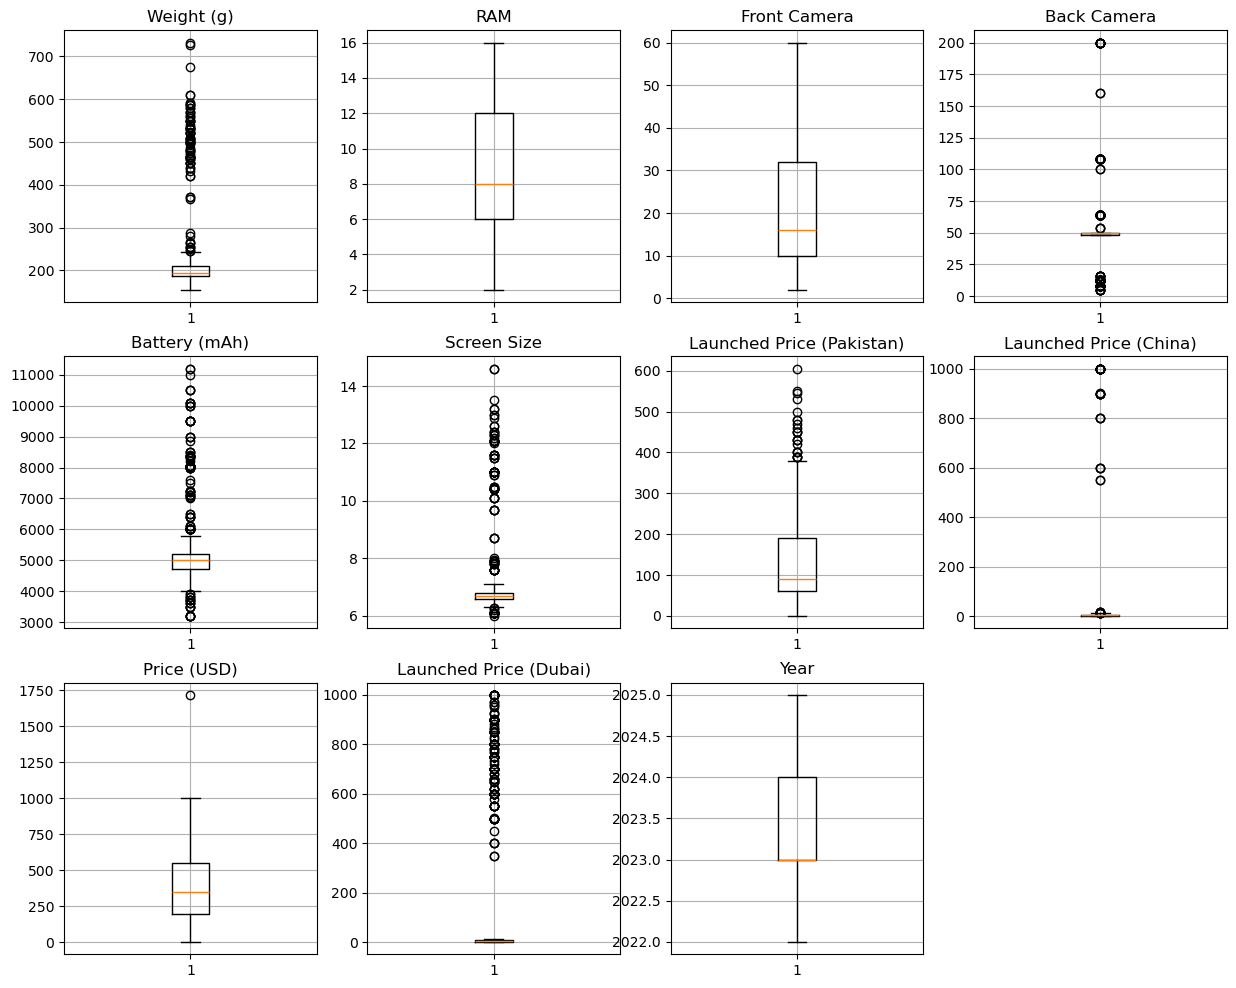

In [15]:
boxplot_by_feature_independently(
    data=df,
    figsize=[15,4],
    n_cols=4
)

Podemos observar, quanto a aplicabilidade das features, com relação à fase de tratamento de dados, que as variáveis de preço possuem uma distribuição de dados bastante irregular. Além disso, é bastante redundante utilizar o preço em várias moedas diferentes. Portanto, vamos utilizar apenas o preço em dólar americano como base (USD), que é a variável de preço com uma distribuição mais regular e também devido o dólar ser moeda de referência internacional.


#### Corte de Moedas

Como ficou decido utilizar o preço em dólar como referência, vamos descartar outras moedas que não agregam informação relevante e também possuem uma distribuição muito mais irregular.

In [16]:
df.columns

Index(['Company Name', 'Model Name', 'Weight (g)', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery (mAh)', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (China)', 'Price (USD)',
       'Launched Price (Dubai)', 'Year', 'model_id'],
      dtype='object')

In [17]:
df = df[['Company Name', 'Model Name', 'Weight (g)', 'RAM', 'Front Camera', \
       'Back Camera', 'Processor', 'Battery (mAh)', 'Screen Size', \
       'Price (USD)', 'Year', 'model_id']]

#### Resultado após tratamentos

Em resumo, foram realizados os seguintes tratamento e/ou verificações nos dados:

1. Tratamento de dados faltantes;
2. Seleção de features, eliminando as que não são de interesse, tais como moedas de vários países;
3. Seleção de dados, eliminando aqueles que não agregam valor à solução, tais como dados de modelos muito antigos;
4. Tratamento de duplicidades;
5. Padronização dos dados, deixando todos no formato mais adequado, tais como na situação de valores monitérios, sem padrão para separação de milhar e decimal;
6. Higienização dos dados, removendo caracteres inválidos, tais como na mistura dos dados numéricos com a unidade de medida.

A partir deste ponto, os dados estão prontos para que seja possível realizar uma análise. Abaixo uma amostra de como ficaram os dados após os tratamentos descritos.

In [18]:
df.head(5)

,Company Name,Model Name,Weight (g),RAM,Front Camera,Back Camera,Processor,Battery (mAh),Screen Size,Price (USD),Year,model_id
0,Apple,iPhone 16 128GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,799.0,2024,73134d8d-c61b-485c-9424-c20b48a1a45b
1,Apple,iPhone 16 256GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,849.0,2024,90ed4881-8b0e-43e1-9be2-4defc6d3efab
2,Apple,iPhone 16 512GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,899.0,2024,4114c3d2-eaa7-4fbf-89e2-a38cb6254b9a
3,Apple,iPhone 16 Plus 128GB,203,6,12.0,48.0,A17 Bionic,4200,6.7,899.0,2024,2dbaf54a-a475-4ad1-8c43-7eb636665ee7
4,Apple,iPhone 16 Plus 256GB,203,6,12.0,48.0,A17 Bionic,4200,6.7,949.0,2024,6fb36fc8-5727-4240-81c8-af42f552808c


## Análise de Dados

Nesta etapa de Análise de Dados Exploratória (EDA) sobre o dataset mobiles, visamos entender a distribuição, as relações e as características das variáveis, o que é crucial para as etapas subsequentes de pré-processamento e modelagem.

### Total e Tipo das Instâncias

O dataset mobiles possui 930 instâncias (modelos de celulates). As características/features são as que já foram apresentadas na descrição do dataset e abordam atributos de hardware do modelo, além do preço e ano de lançamento que, neste caso, são todos de 2025.

Quanto as classes de interesse, elas ainda não estão definidas, mas serão determinadas por meio dos critérios que serão avaliados nesse estudo para definir quais seriam as características de referência para cada uma das classes, consderando os padrões atuais adotados pelo mercado.

In [19]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 631

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
Index: 631 entries, 0 to 929
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company Name   631 non-null    object 
 1   Model Name     631 non-null    object 
 2   Weight (g)     631 non-null    int64  
 3   RAM            631 non-null    int64  
 4   Front Camera   631 non-null    float64
 5   Back Camera    631 non-null    float64
 6   Processor      631 non-null    object 
 7   Battery (mAh)  631 non-null    int64  
 8   Screen Size    631 non-null    float64
 9   Price (USD)    631 non-null    float64
 10  Year           631 non-null    int64  
 11  model_id       631 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 64.1+ KB
None


### Estatísticas Descritivas

Estatísticas descritivas fornecem um resumo das características numéricas, incluindo média, desvio padrão, mínimo, máximo e quartis.

In [20]:
# estatísticas descritivas básicas do dataset
df.describe()

,Weight (g),RAM,Front Camera,Back Camera,Battery (mAh),Screen Size,Price (USD),Year
count,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000,631.000000
mean,233.171157,8.456418,19.104279,51.619968,5291.568938,7.208288,391.634300,2023.267829
std,105.669187,3.183427,12.704858,32.063105,1261.053916,1.570887,291.529348,0.835461
min,155.000000,2.000000,2.000000,5.000000,3200.000000,6.000000,1.049000,2022.000000
25%,187.000000,6.000000,10.000000,48.000000,4700.000000,6.600000,194.500000,2023.000000
50%,195.000000,8.000000,16.000000,50.000000,5000.000000,6.700000,349.000000,2023.000000
75%,210.000000,12.000000,32.000000,50.000000,5200.000000,6.800000,549.000000,2024.000000
max,732.000000,16.000000,60.000000,200.000000,11200.000000,14.600000,1719.000000,2025.000000


#### Média

A média é uma medida de tendência central que representa o valor típico ou o ponto de equilíbrio de um conjunto de dados. É calculada somando-se todos os valores e dividindo-se pelo número total de observações. É sensível a valores extremos (outliers).

In [21]:
# média dos atributos numéricos do dataset
df.describe().loc['mean']

Weight (g)        233.171157
RAM                 8.456418
Front Camera       19.104279
Back Camera        51.619968
Battery (mAh)    5291.568938
Screen Size         7.208288
Price (USD)       391.634300
Year             2023.267829
Name: mean, dtype: float64

A seguir, vamos analisar a distribuição dos dados utilizando boxplots indedepentes para cada uma das features. Analisá-las em boxplots separadas evita o problema de comparar campos em escalas diferentes. Aqui não queremos comparar as colunas, mas sim verificar a distribuição dos dados em cada uma delas. O boxplot mostra os quartis e também a média da variável.

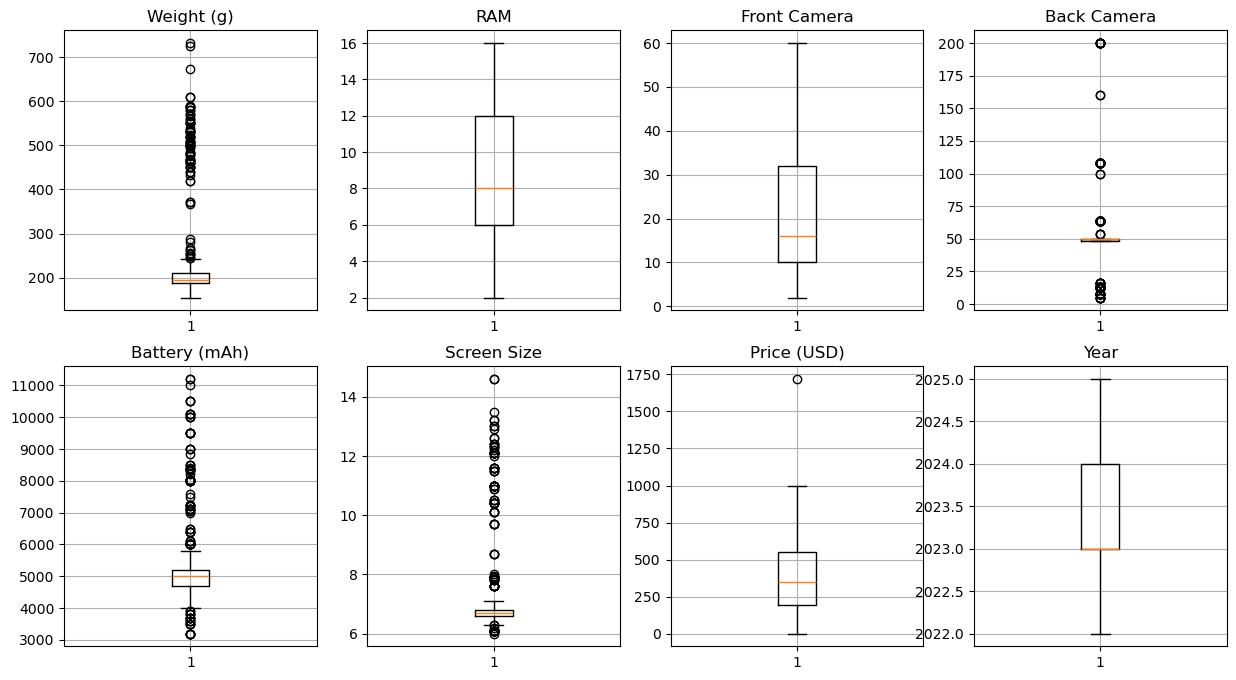

In [22]:
boxplot_by_feature_independently(df)

Nos boxplots das colunas podemos observar distribuições bastante irregulares e a presença de muitos outliers.
Porém, isso é justificável em alguns casos, conforme abaixo:

- O tamanho tela (Screen Size) sofre por misturar modelos de smartphone com modelos de tablet no dataset;

- A capacidade das baterias têm passado por uma fase de transição no mercado, tendo se tornado comum o lançamento de modelos com baterias muito melhores e de alta capacidade, isso pode explicar a distribuição bastante irregular. Hoje é comum encontrar baterias maiores que 5.000 mAh, algo raro a até pouco tempo atrás.

- O peso do aparelho talvez tenha alguma correlação com a capacidade da bateria, essa hipótese será avaliada posteriormente.

- A câmera principal (traseira) também têm passado por uma fase de rápidos avanços, tendo saltado de menos de 50 Mp para mais 200 Mp em muito pouco tempo. Diferentemente da câmera frontal, usada para selfies, que pouco têm evoluído de um modo geral.

#### Desvio Padrão

O desvio padrão é uma medida de dispersão que quantifica a quantidade de variação ou dispersão de um conjunto de valores. Um desvio padrão baixo indica que os pontos de dados tendem a estar próximos da média do conjunto, enquanto um desvio padrão alto indica que os pontos de dados estão espalhados por uma faixa maior de valores. Ele é a raiz quadrada da variância.

In [23]:
# desvio padrão dos atributos numéricos do dataset
df.describe().loc['std']

Weight (g)        105.669187
RAM                 3.183427
Front Camera       12.704858
Back Camera        32.063105
Battery (mAh)    1261.053916
Screen Size         1.570887
Price (USD)       291.529348
Year                0.835461
Name: std, dtype: float64

Ao observar o desvio padrão temos a confirmação do que já observamos nos boxplots, ou seja, distribuições muito irregulares com amostrar bastante distantes da média, principalmente para variáveis como peso do aparelho, bateria e preços.

#### Histograma

A distribuição de dados descreve como os valores de uma variável se espalham, ou seja, a frequência com que diferentes valores ocorrem. Entender a distribuição é crucial na análise de dados, pois revela padrões, tendências centrais, dispersão e a presença de valores atípicos (outliers). O histograma é uma ferramenta visual fundamental para representar essa distribuição, mostrando a forma dos dados, se são simétricos ou assimétricos, unimodais ou multimodais.

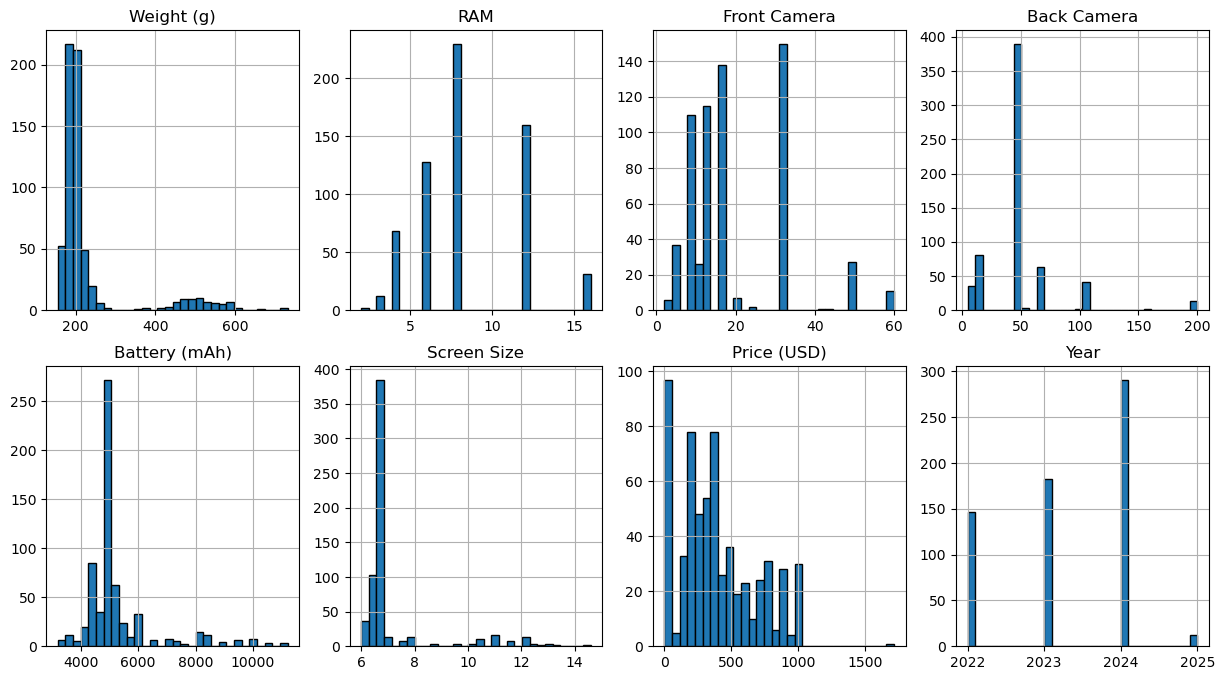

In [24]:
histogram_by_feature_independently(df)

Pode-se observar que, das característricas técnicas presentes:
- O peso está bastante concentrado em torno dos 200 gramas, com poucas amostras, aparentemente exceções, acima dos 400 gramas e que, provavelmente, são de tablets misturados na base.
- A memória RAM está bastante esparça e com um domínio bastante limitado, já que não existem muitas opções de quantidades de memória. Há uma maior concentração na faixa dos 8 GB.
- A câmera frontal apresenta uma distribuição bastante irregular, havendo várias amostras de várias faixas diferentes. Não é possível observar um padrão ou predominância de determinada faixa pelo gráfico.
- A câmera traseira apresenta maior concentração na faixa dos 50 Mpx, deixando as outras especificações bastante pouco representadas.
- A capacidade da bateria se concentra especialmente na faixa dos 5.000 mAp.
- O tamanho da tela apresenta grande concentração próximo de 7". Os demais tamanhos ficam bem pouco representados, em especial fora da faixa entre 6" e 7". Provavelmente são tablets misturados no dataset.

Além disso, temos a distribuição do preço, bastante irregular e com maior concentração em zero, que demonstra uma deficiência no dataset.

### Matriz de Correlação

A matriz de correlação mede a força e a direção de uma relação linear que os atributos numéricos das espécies podem ter. Valores próximos a 1 indicam uma forte correlação positiva, -1 uma forte correlação negativa, e 0 ausência de correlação linear.

In [25]:
df.columns

Index(['Company Name', 'Model Name', 'Weight (g)', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery (mAh)', 'Screen Size',
       'Price (USD)', 'Year', 'model_id'],
      dtype='object')

In [26]:
# Matriz de correlação
print("\nMatriz de Correlação:")
df.iloc[:, np.r_[2:6, 7:10]].corr()


Matriz de Correlação:


,Weight (g),RAM,Front Camera,Back Camera,Battery (mAh),Screen Size,Price (USD)
Weight (g),1.000000,0.007803,-0.298064,-0.364729,0.878919,0.978770,0.055293
RAM,0.007803,1.000000,0.424098,0.323944,0.070482,0.028736,0.196444
Front Camera,-0.298064,0.424098,1.000000,0.403275,-0.225656,-0.248202,0.248579
Back Camera,-0.364729,0.323944,0.403275,1.000000,-0.263286,-0.350822,-0.071742
Battery (mAh),0.878919,0.070482,-0.225656,-0.263286,1.000000,0.893578,0.056097
Screen Size,0.978770,0.028736,-0.248202,-0.350822,0.893578,1.000000,0.071151
Price (USD),0.055293,0.196444,0.248579,-0.071742,0.056097,0.071151,1.000000


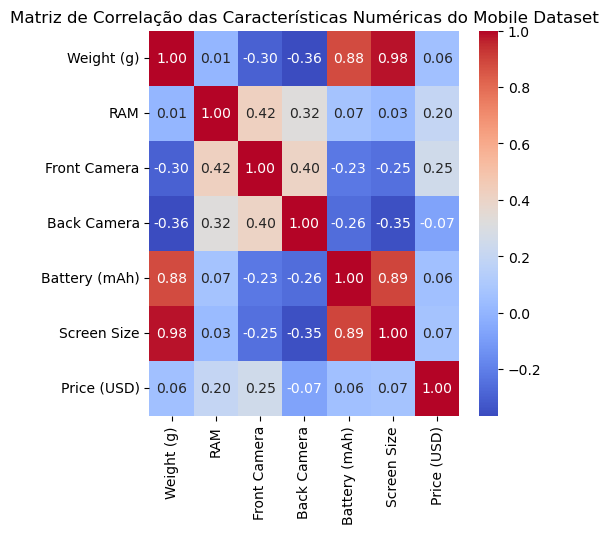

In [27]:
# mapa de calor das variáveis numéricas
plt.figure(figsize=(5, 5))
sns.heatmap(df.iloc[:, np.r_[2:6, 7:10]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Características Numéricas do Mobile Dataset')
plt.show()

Podemos observar as seguintes correlações positivas que se destacam:
- Tamanho da tela e peso do aparelho;
- Tamanho da tela e capacidade da bateria;
- Capacidade da bateria e peso do aparelho;

Essas relações podem ser consideradas bastante evidentes, não tendo sido descoberto nada além do esperado.

Uma relação mais forte que, particularmente, eu esperava encontrar, é a da câmera frontal com a traseira. Aparentemente a preocupação com a qualidade das selfies não chega perto da preocupação em melhorar a qualidade das fotografias comuns. Talves seria interessante realizar uma pesquisa de mercado para ver se o investimento nesse item não seria um diferencial no mercado. Porém, como encontramos câmeras frontais com até 50 Mpx, a hipótese mais provável é que esse item já ofereça uma qualidade bastante satisfatória para o usuário e, por isso, não convém investir ainda mais.

Quando às correlações negativas, nenhuma chama à atenção.

## Análise de Dados (Negócio)

Nesta seção será realizada uma análise para validação das hipóteses (já apresentadas) por meios de métricas de negócio. O objetivo é estabelecer parâmetros para definir quais seriam os critérios adequadas às classes de interesse (já discriminadas). Como a base não está rotulada, não poderia ser utilizada para treinar um modelo de classificação. Porém, a definição de parâmetros de negócio por meio das métricas apresentadas a seguir dará uma solução a esta deficiência do dataset.

As seguintes métricas de negócio serão considerados na análise para determinar um rótulo para os elementos do dataset:

*1. Métricas de Preço por Empresa (fabricante)*

- Preço médio, mais alto e mais baixo por empresa: Qual é o smartphone mais caro e mais barato de cada fabricante?

*2. Métricas Técnicas por Empresa*

- Média, mínimo e máximo da capacidade da bateria por empresa;
- Média, mínimo e máximo do tamanho de tela dos smartphones por empresa;
- Média, mínimo e máximo da memória RAM dos smartphones por empresa;

*3. Métricas de Desempenho – TOP TEN*

- Smartphones com maior capacidade de bateria;
- Smartphones com maior memória RAM;
- Smartphones com melhor câmera traseira.

### Métricas de Preço por Empresa

Métricas de negócio relacionadas à preço por empresa concorrente:

- Preço médio, mais alto e mais baixo por empresa: Qual é o smartphone mais caro e mais barato em cada país?

#### Agrupando por empresa e calculando estatísticas de preço

In [28]:
df_price = df.groupby('Company Name').agg({
    'Price (USD)': ['mean', 'min', 'max', 'std']
}).reset_index()
df_price.columns = ['Company', 'Average', 'Min', 'Max', 'Std Dev)']
df_price.head(3)

,Company,Average,Min,Max,Std Dev)
0,Apple,427.939750,1.049,999.0,460.170068
1,Google,499.654273,1.099,999.0,360.252109
2,Honor,339.238746,1.099,999.0,297.132916


#### Gráfico de linha para o preço máximo por fabricante

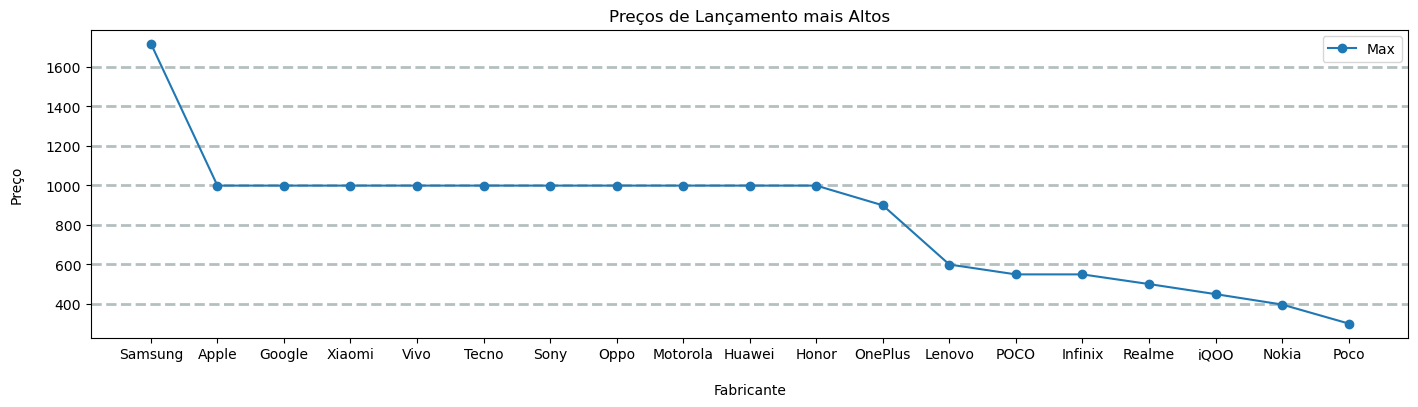

In [29]:
line_graph(
    data=df_price, col_index=3, col_labels='Company', col_values='Max',
    title='Preços de Lançamento mais Altos', xlabel='\nFabricante', ylabel='Preço\n'
)

Observamos uma forte tendência ao lançamento de modelos mais sofisticados na faixa dos USD 1.000. Muitos fabricantes adotam esta estratégia, de forma que é interessante lançar um modelo com mais recursos nessa faixa.

Há também modelos da Sansung que saem muito do padrão, alcançando preços de lançamento perto de USD 2.000 - seria interessante verificar que modelo é esse para saber se é interessante considerá-lo na análise, mas a tendência maior é descartar, pois o objetivo de negócio é estabelecer características técnicas e de preço mais comuns para o lançamento de um produto dentro dos padrões de mercado. Logo, algo que se parece um outlier (mesmo que não seja), não é muito interessante para os fins deste trabalho.

#### Gráfico de linha para o preço mínimo por fabricante

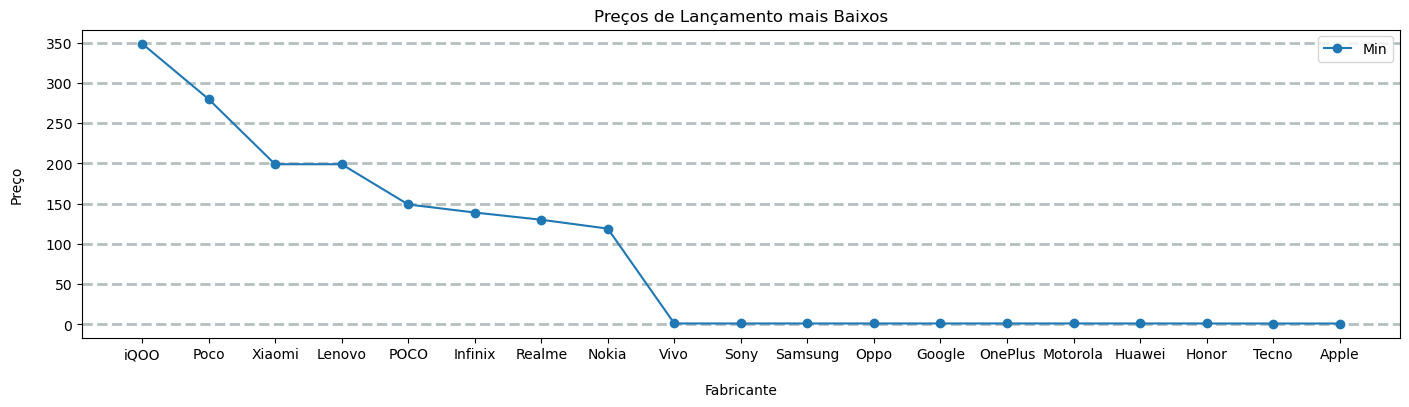

In [30]:
line_graph(
    data=df_price, col_index=2, col_labels='Company', col_values='Min', 
    title='Preços de Lançamento mais Baixos', xlabel='\nFabricante', ylabel='Preço\n'
)

Observamos no gráfico que muitos fabricantes apresentam zero como valor mínimo. Possivelmente uma deficiência do dataset que não foi percebida durante o tratamento de dados. Apesar disso, podemos perceber que a maioria dos fabricantes adotam uma precificação mínima em torno dos USD 150, com uma pequena variação para mais ou para menos.

#### Gráfico de linha para o preço médio por fabricante

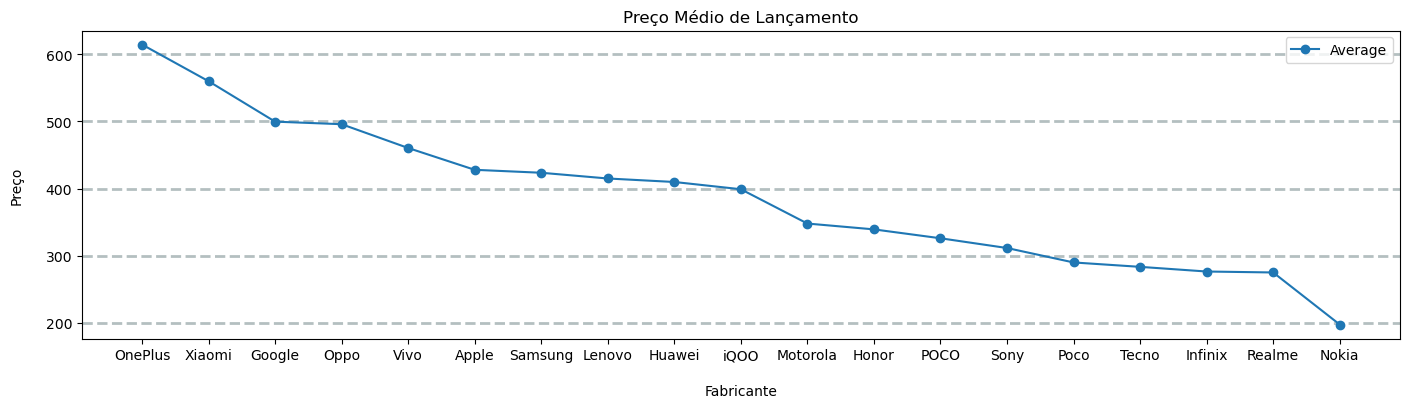

In [31]:
line_graph(
    data=df_price, col_index=1, col_labels='Company', col_values='Average', 
    title='Preço Médio de Lançamento', xlabel='\nFabricante', ylabel='Preço\n'
)

A média é bastante variada e fica prejudicada devido ao mínimo de muitos fabricantes ser zero. Contudo, a maioria dos fabricantes está em torno dos USD 400. Vamos adotar o valor de R$ 450 como preço ideal para um modelo intermediário, sendo esses USD 50 uma tentativa de compensar os zeros que puxam a média para baixo. Como este trabalho possui fins didáticos, essa medida é suficiente. Num caso real, eu retornaria ao tratamento de dados para resolver o problema dos modelos sem preço (zero) e, desta forma, obter números mais realistas. Além disso, observaria também o desvio padrão (após o tratamento) para verificar o distanciamento da média.

### Métricas Técnicas por Empresa

- Média, mínimo e máximo da capacidade da bateria por empresa;
- Média, mínimo e máximo do tamanho de tela dos smartphones por empresa;
- Média, mínimo e máximo da memória RAM dos smartphones por empresa;

#### Agrupando por características técnicas por fabricante

In [32]:
df_tech = df.groupby('Company Name').agg({
    'Battery (mAh)': ['mean', 'min', 'max', 'std'],
    'Screen Size': ['mean', 'min', 'max', 'std'],
    'RAM': ['mean', 'min', 'max', 'std'],
}).reset_index()
df_tech.columns = [
    'Company', 
    'Battery Avg', 'Battery Min', 'Battery Max', 'Battery Std', 
    'Screen Size Avg', 'Screen Size Min', 'Screen Size Max', 'Screen Size Std', 
    'RAM Avg', 'RAM Min', 'RAM Max', 'RAM Std'
]
df_tech.head(3)

,Company,Battery Avg,Battery Min,Battery Max,Battery Std,Screen Size Avg,Screen Size Min,Screen Size Max,Screen Size Std,RAM Avg,RAM Min,RAM Max,RAM Std
0,Apple,4110.416667,3200,4500,475.633975,6.400000,6.10,6.7,0.304256,6.666667,6,8,0.956183
1,Google,4778.181818,4355,5500,404.655858,6.509091,6.10,7.6,0.454873,10.363636,6,16,3.443043
2,Honor,5969.491525,4000,10500,1784.488166,8.495763,6.52,13.5,2.431578,8.542373,3,16,3.475640


#### Gráfico para capacidades de bateria mais altas

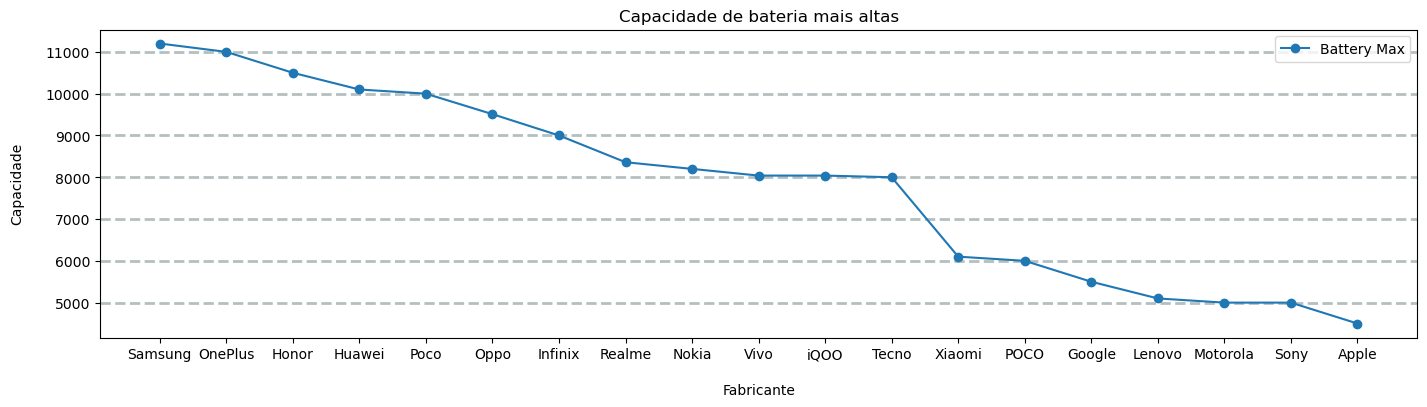

In [33]:
line_graph(
    data=df_tech, col_index=3, col_labels='Company', col_values='Battery Max', 
    title='Capacidade de bateria mais altas', xlabel='\nFabricante', ylabel='Capacidade\n'
)

A capacidade das baterias têm uma faixa dinâmica de distribuição bastante ampla, indo de 2.000 mAph a 11.000 mAh. Os modelos mais sofisticados da maioria dos fabricantes partem da faixa dos 5.000 mAh, que é uma capacidade considerável. Há até pouco tempo, era difícil encontrar modelos com essa capacidade de bateria ou superior.

Vemos uma forte tendência a baterias mais robustas para dar suporte as demandas dos usuários, cada vez mais conectados e utilizando os smartphones por períodos prolongados.

A Apple, que já vem sofrendo duras críticas quanto a este quesito há tempos, continua atrás dos concorrentes pelos dados deste dataset.

#### Gráfico para capacidade média das baterias

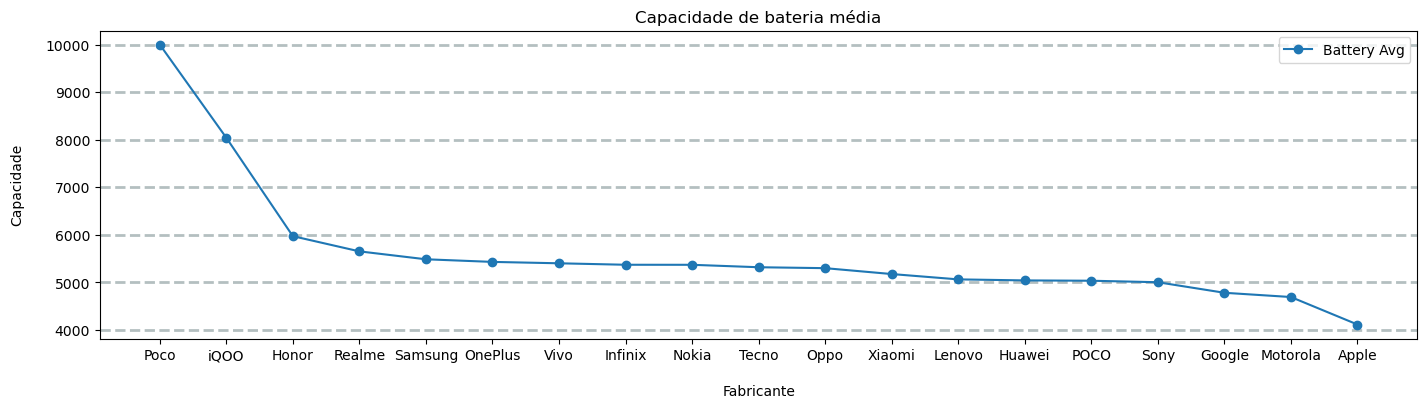

In [34]:
line_graph(
    data=df_tech, col_index=1, col_labels='Company', col_values='Battery Avg', 
    title='Capacidade de bateria média', xlabel='\nFabricante', ylabel='Capacidade\n'
)


Pelos gráfico, vê-se uma média geral bastante estável, por volta dos 5.000 mAh. O que dá indícios de ser uma faixa interessante para a construção de novos modelos, ao menos modelos intermediários.

#### Gráfico para capacidades de bateria mais baixas

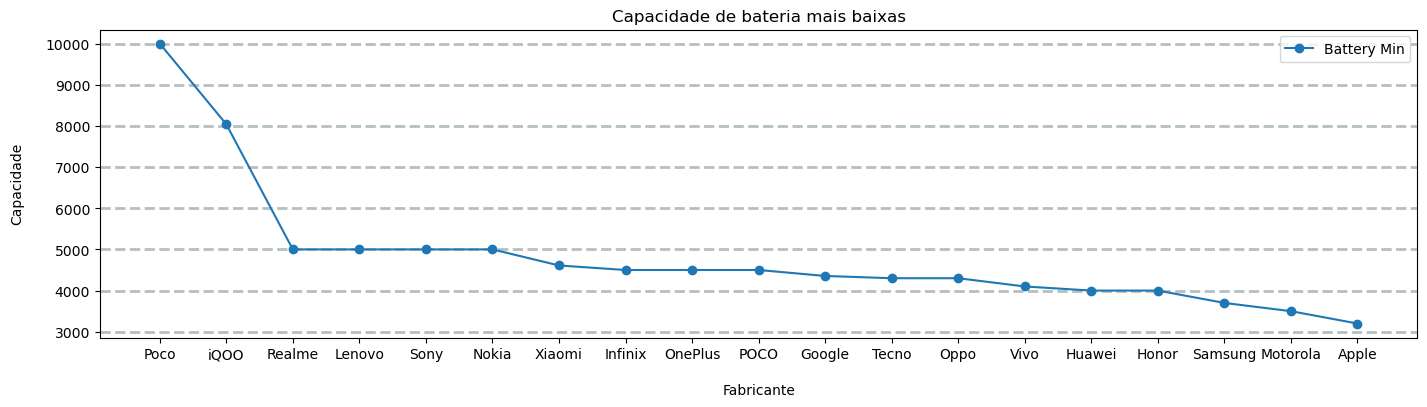

In [35]:
line_graph(
    data=df_tech, col_index=2, col_labels='Company', col_values='Battery Min', 
    title='Capacidade de bateria mais baixas', xlabel='\nFabricante', ylabel='Capacidade\n'
)

Quando olhamos as capacidades mínimas, reforçamos a noção de que a faixa dos 5.000 mAh é bastante relevante hoje no mercado. Os modelos com baterias inforiores a esta faixa não se desviam muito dela para baixo. Isso significa, para nosso estudo, que um modelo de entrada não deve se distanciar muito dos 5.000 mAh, podendo descer, quando muito, aos 4.000 mAh para não perder muita competitividade no mercado.

Caso o custo de fabricação não sofra muito impacto com essa pequena diferença de capacidade de bateria, seria interessante manter modelos de entrada e intermediários com a mesma bateria, de 5.000 mAh.

#### Gráfico para telas maiores

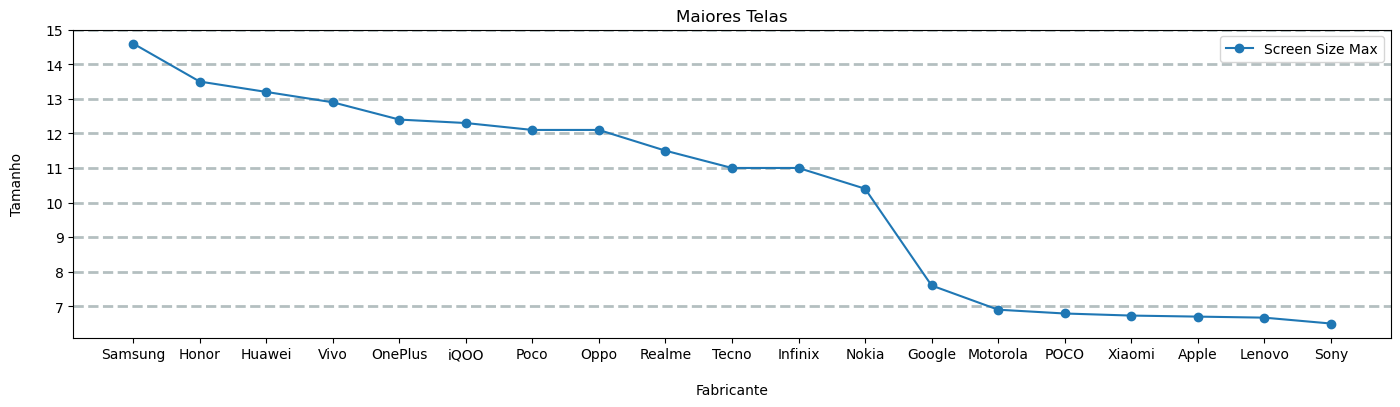

In [36]:
line_graph(
    data=df_tech, col_index=7, col_labels='Company', col_values='Screen Size Max', 
    title='Maiores Telas', xlabel='\nFabricante', ylabel='Tamanho\n'
)

O tamanho das tela é bastante variável. Certamente há modelos de tablet misturados com modelos de smartphones na base, pois as máximas mostram modelos próximos a 15 polegadas. Além disso, cerca de 2/3 do gráfico de máximas mostra modelos com telas acima de 11 polegadas, o que é muito para um smartphone.

#### Gráfico para média de telas

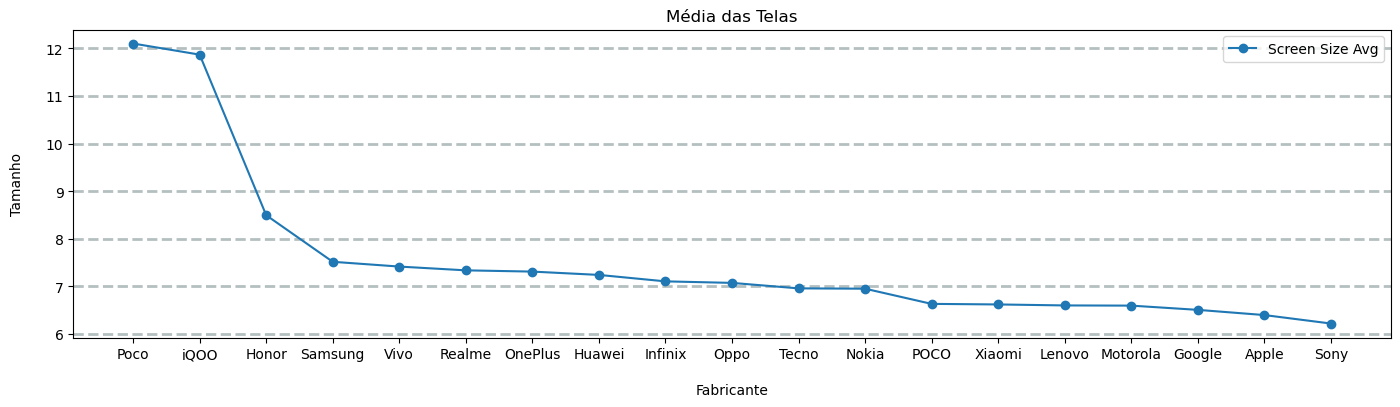

In [37]:
line_graph(
    data=df_tech, col_index=5,col_labels='Company', col_values='Screen Size Avg', 
    title='Média das Telas', xlabel='\nFabricante', ylabel='Tamanho\n'
)

A média geral ficou bastante prejudicada pela presença de tablets no dataset, levando a amioria dos fabricantes a apresentar média próxima de 7 polegadas, bastante perto do gráfico de valores mínimos (a seguir).

Para efeitos didáticos vamos seguir desta forma e desconsiderar o tamanho de tela na determinação das classes. Numa situação real, voltaríamos ao tratamento de dados para separar smartphones e tablets, refazendo toda a análise em seguida.

#### Gráfico para telas menores

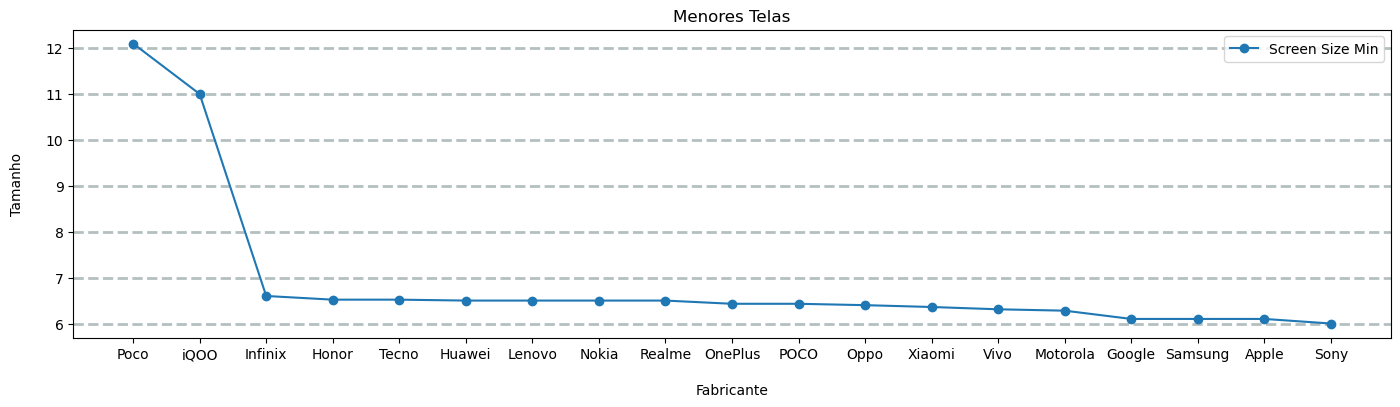

In [38]:
line_graph(
    data=df_tech, col_index=6, col_labels='Company', col_values='Screen Size Min', 
    title='Menores Telas', xlabel='\nFabricante', ylabel='Tamanho\n'
)

Conforme comentado, o mínimo ficou muito próximo da média, devido presença de tablets. Observamos também o que parece ser um outlier, porém, na verdade, é um elemento que não deveria fazer parte do conjunto de dados e precisaria ser tratado.

#### Gráfico para maiores capacidades de RAM

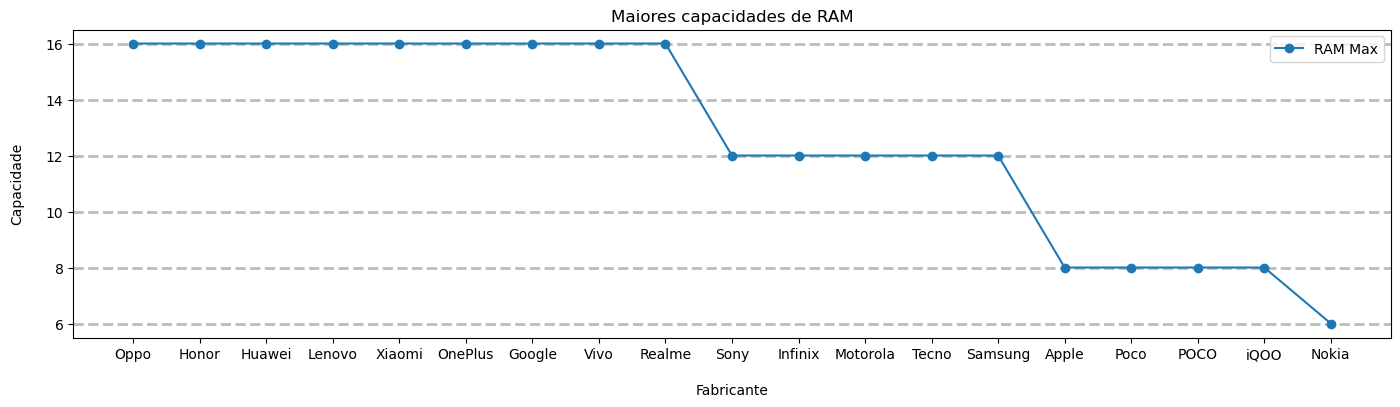

In [39]:
line_graph(
    data=df_tech, col_index=11, col_labels='Company', col_values='RAM Max', 
    title='Maiores capacidades de RAM', xlabel='\nFabricante', ylabel='Capacidade\n'
)

A grande maioria dos fabricantes têm sua máxima ente 12 GB e 16 GB, estabelecendo um padrão para os modelos top de linha. Apenas 5 fabricantes possuem máxima de 8 GB e a Nokia encontra-se isolada com 6 GB. Dessa forma, para obter competitividade, o mínimo para a classe especial/premium seria de 12 GB.

#### Gráfico para média das capacidades de RAM

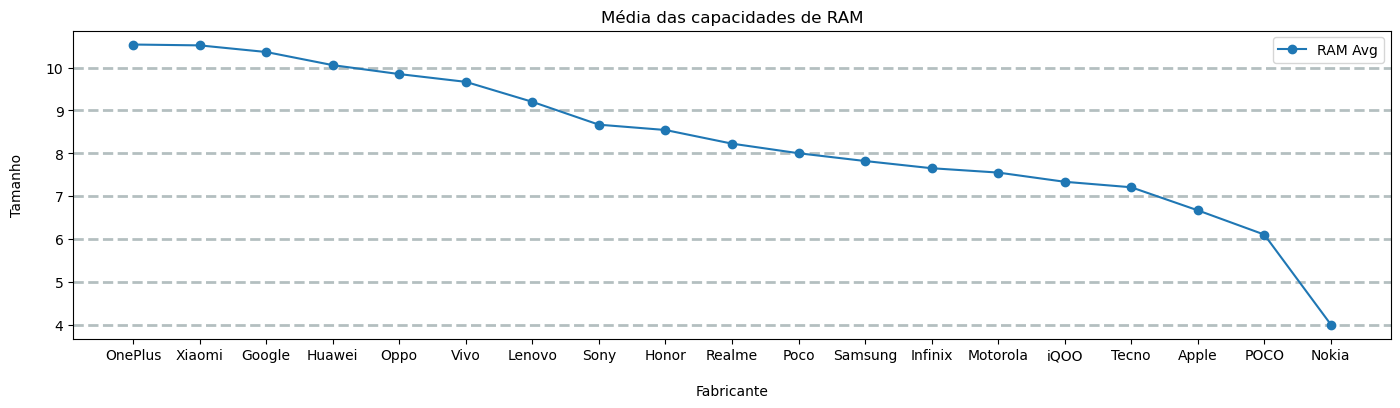

In [40]:
line_graph(
    data=df_tech, col_index=9, col_labels='Company', col_values='RAM Avg', 
    title='Média das capacidades de RAM', xlabel='\nFabricante', ylabel='Tamanho\n'
)

A média entre os fabricantes é bastante variável. Porém, descartando a Nokia, que tornou-se um outlier, podemos considerar que 8 GB seria uma quantidade ideal para modelos intermediários. Essa quantidade de 8 GB é a máxima dos fabricantes menos competitivos em termos de memória e está próximo da média geral de todos os fabricantes.

#### Gráfico para menores capacidades de RAM

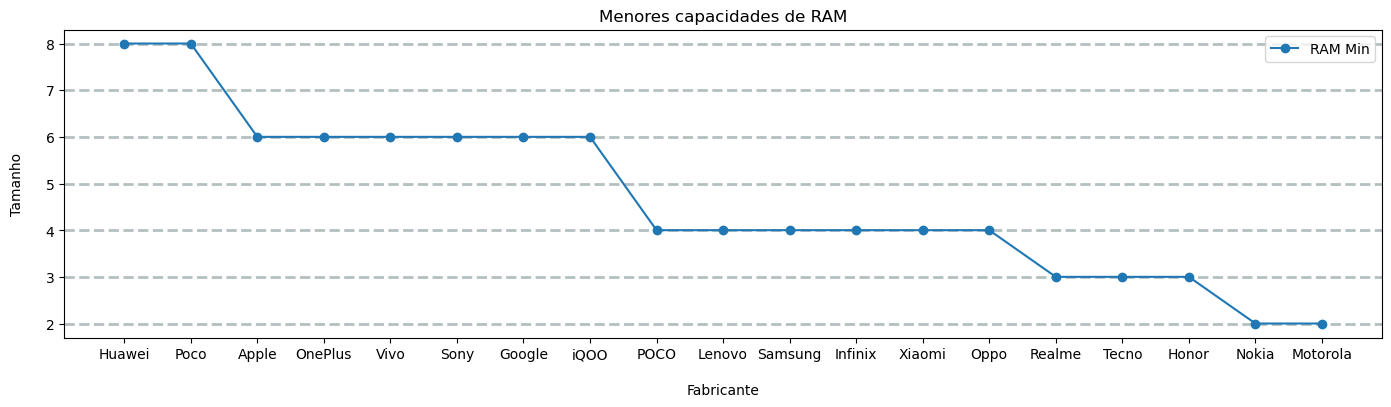

In [41]:
line_graph(
    data=df_tech, col_index=10, col_labels='Company', col_values='RAM Min', 
    title='Menores capacidades de RAM', xlabel='\nFabricante', ylabel='Tamanho\n'
)

Os valores mínimos da capacidade de memória vão de 2 GB a 8 GB, mostranando bastante variação. Porém, para os padrões atuais de mercado, valores abaixo de 4 GB são considerados bastante deficientes. Desta forma, uma quantidade ideal de memória para modelos de entrada seria de 6 GB, podendo descer no máximo a 4 GB.

### Métricas de Desempenho – TOPS

- Smartphones com maior capacidade de bateria;
- Smartphones com maior memória RAM;
- Smartphones com melhor câmera traseira.

#### Smartphones com maior capacidade de bateria

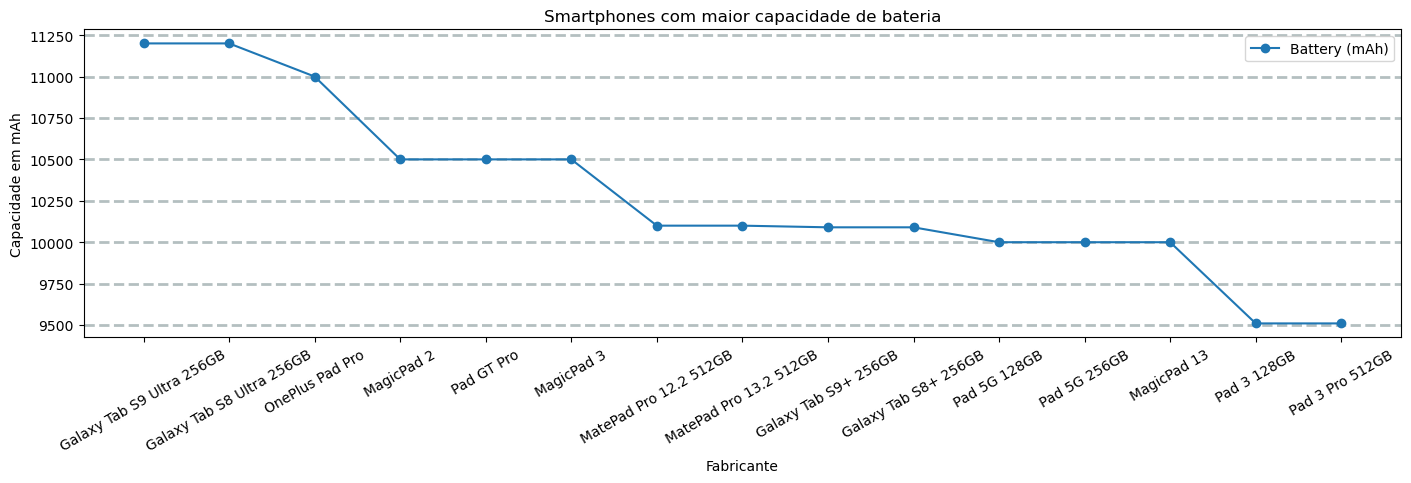

In [42]:
battery_tops = df[['Model Name', 'Battery (mAh)']] \
    .sort_values(by='Battery (mAh)', ascending=False) \
    .head(15)

line_graph(
    data=battery_tops, col_index=1, col_labels='Model Name', 
    col_values='Battery (mAh)', title='Smartphones com maior capacidade de bateria', 
    xlabel='Fabricante', ylabel='Capacidade em mAh', rotation=30
)

Com este gráfico podemos confirmar o quanto os fabricantes têm investido em baterias potentes, em especial para modelos top de linha, que se aproximam ou ultrapassam os 10.000 mAh.

#### Smartphones com maior câmera traseira

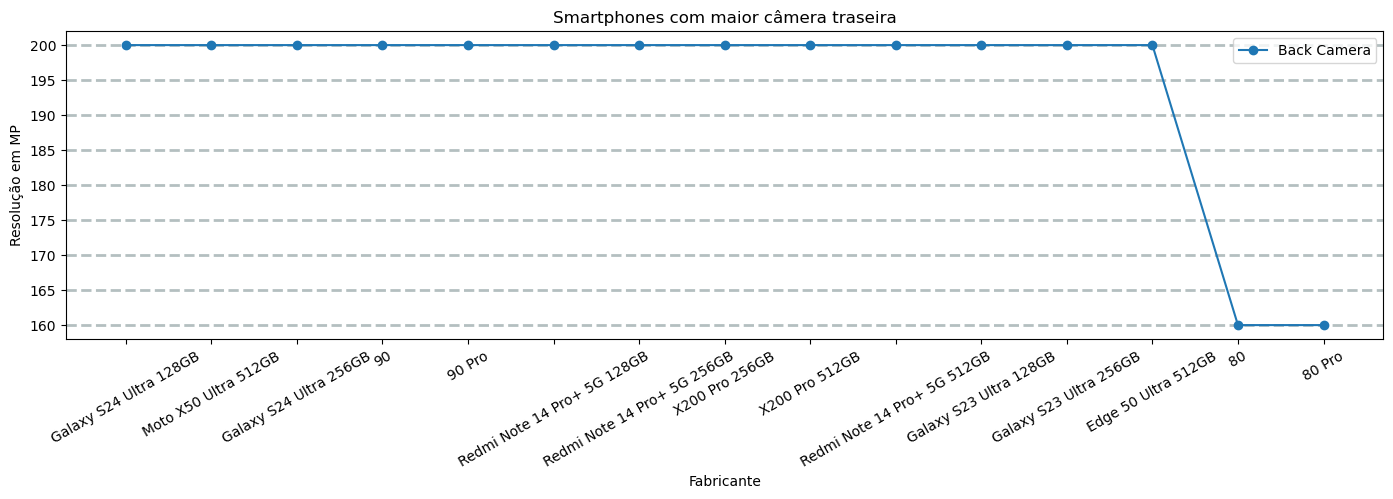

In [43]:
camera_tops = df[['Model Name', 'Back Camera']] \
    .sort_values(by='Back Camera', ascending=False) \
    .head(15)

line_graph(
    data=camera_tops, col_index=1, col_labels='Model Name', 
    col_values='Back Camera', title='Smartphones com maior câmera traseira', 
    xlabel='Fabricante', ylabel='Resolução em MP', rotation=30
)

Os modelos mais sofisticados têm câmeras bastante potentes, chegando a resolução de até 200 Mpx. Esse quesito é de extremo valor para consumidores em geral, que vêem na fotografia uma das principais funções de seus Smartphones.

#### Smartphones com maior memória RAM

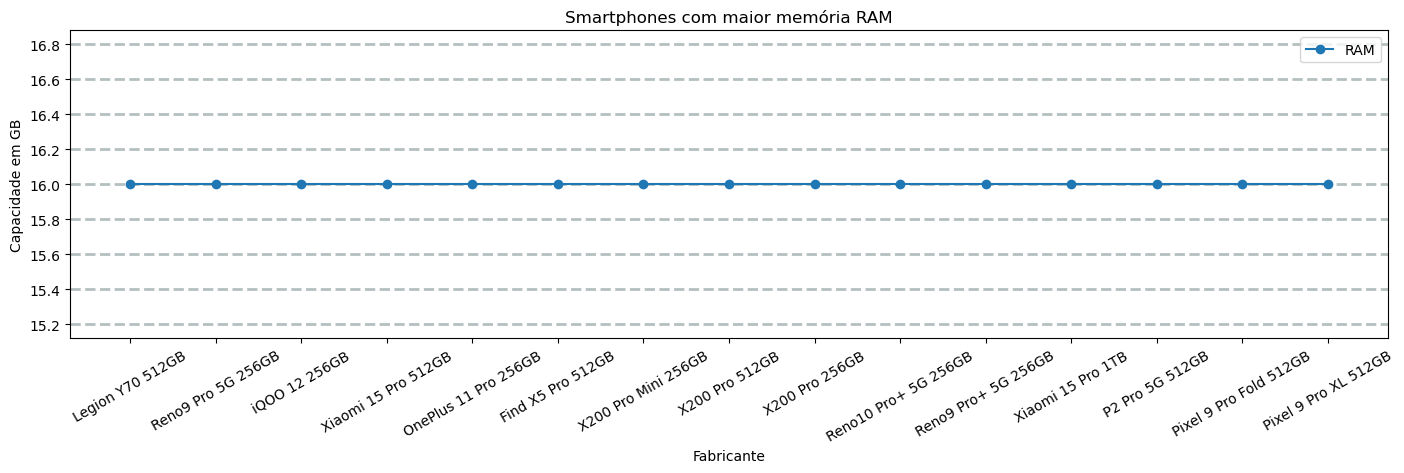

In [44]:
ram_tops = df[['Model Name', 'RAM']] \
    .sort_values(by='RAM', ascending=False) \
    .head(15)

line_graph(
    data=ram_tops, col_index=1, col_labels='Model Name', 
    col_values='RAM', title='Smartphones com maior memória RAM', 
    xlabel='Fabricante', ylabel='Capacidade em GB', rotation=30
)

Este gráfico, junto com outros que observamos, evidencia a tendência a altas quantidades de memória, em especial nos modelos tops de linha. Um modelo de classe especial precisa ter ao menos 12 GB de memória para ter um mínimo de competitividade.

### Conclusões da Análise de Métricas

#### Baterias

A capacidade das baterias têm uma faixa dinâmica de distribuição bastante ampla, indo de 2.000 mAph a 11.000 mAh. Os modelos mais sofisticados partem da faixa dos 5.000 mAh, demonstrando um salto significativo com relação a modelos mais antigos.

Vemos uma forte tendência a baterias mais robustas para dar suporte as demandas dos usuários, cada vez mais conectados e utilizando os smartphones por períodos prolongados. A Apple é um fabricante que já sofreu duras críticas a capacidade das baterias de seus modelos, mas hoje aparece com modelos bastante potentes nesse quesito, apresentando baterias com até mais de 10.000 mAh - apesar de a média dos modelos ser ainda bastante baixa.

Pelos dados, vê-se uma média geral bastante estável, por volta dos 5.000 mAh. O que dá indícios de ser uma faixa interessante para a construção de novos modelos.

#### Tamanho das Telas

O tamanho das tela é bastante variável. Isso pode ter impacto por haver modelos de tablet misturados com modelos de smartphones na base, pois as máximas mostram modelos de até 15 polegadas.

Além disso, cerca de 2/3 do gráfico de máximas mostra modelos com telas acima de 11 polegadas, o que é muito para um smartphone. Isso prejudica a média geral, levando-a para próximo de 7 polegadas, bastante perto do gráfico de valores mínimos, o que demonstra um forte desvio padrão na amostra.

É preciso aprofundar a análise sobre as telas para chegar a uma conclusão mais assertiva.

#### Memória RAM

A análise da capacidade de memória RAM mostra uma faixa de distribuição dinâmica curta (conforme esperado), variando entre 2 GB e 16 GB, uma variação de 14 GB, porém com domínio de campo bastante limitado. Apesar disso, sabemos que cada 1 GB a mais de memória RAM é algo bastante significativo em termos de performance.

Percebe-se que poucos fabricantes ainda trabalham com memórias abaixo de 4 GB, o que podemos entender como um padrão mínimo de mercado, mesmo para modelos de entrada nos dias atuais. Dois terços do gráfico de mínimas apresentam modelos com 4 GB ou mais.

Já as máximas chegam a 16 GB, sendo que metade dos fabricantes possuem modelos com essa capacidade e mais de 2/3 oferecem modelos mais sofisticados a partir de 12 GB. Logo, o lançamento de um modelo nessa categoria mostra-se de grande importância.

### Resposta das Hipóteses

Mesmo constatando que poderíamos fazer ainda mais tratamento nos dados, já temos insumos para responder as perguntas de negócio (hipóteses) propostas no início e, desta forma, chegamos a uma definição dos critérios necessários para rotular as classes de interesse do problema, como segue:

a) Quais características técnicas dos aparelhos são mais relevantes para lançamento de novos modelos?

Algumas características técnicas chamam mais a atenção e demonstram maior relevância, assim como uma tendência de mercado ao investimento nelas, tais como capacidade da bateria, capacidade da memória RAM, tamanho da tela e resolução da câmera principal ou câmera traseira. Estes elementos demonstram bastante correlação com o preço dos produtos.

Embora algumas características necessitam aprofundamento na análise, mais tratamentos ou mais dados, conforme já comentado, já é possível indicar, a partir da análise realizada, alguns insights interessantes para proposta dos modelos de lançamento:

1. Classe de Entrada: Bateria de 4.000 mAh e 6 GB de memória RAM.
2. Classe Intermediária: Bateria de 6.000 mAh e 8 GB de memória RAM.
3. Classe Especial: Bateria acima de 8.000 mAh e pelo menos 12 GB de memória RAM.

b) Quais as faixas de preço praticadas pelo mercado?

Apesar dos problemas encontrados, pode-se definir como critério para rotulação do dataset os seguintes preços por classe de modelo:

1. Classe de Entrada: Até USD 300
2. Classe Intermediária: Entre USD 300 e USD 800
3. Classe Especial: Acima de USD 800

## Pré-Processamento de Dados

O pré-processamento de dados é uma etapa crucial para preparar os dados para modelagem, garantindo que estejam no formato correto e otimizados para o desempenho do algoritmo.

Como já realizamos vários tratamentos no início, devido os dados estarem poluídos a ponto de nem mesmo viabilizar uma análise via estatística descritiva, o trabalho de pré-processamento será bem menor.

### Rotulação dos Dados

Com base nos critérios que definimos na fase de análise, vamos rotular os dados entre as tês classes de interesse para podermos utilizar o dataset para o treino do modelo de classificação. Os rótulos utilizados serão os seguintes:

- Classe de entrada: 1
- Classe intermediária: 2
- Classe especial: 3

In [45]:
df['Classe'] = df.apply(
    lambda x: 1 if x['Price (USD)'] >= 800 and x['Battery (mAh)'] >= 8000  and x['RAM'] >= 12 else
              3 if x['Price (USD)'] <= 300 and x['Battery (mAh)'] <= 4000  and x['RAM'] <= 6 else 
              2,
    axis=1
)
df.head(5)

,Company Name,Model Name,Weight (g),RAM,Front Camera,Back Camera,Processor,Battery (mAh),Screen Size,Price (USD),Year,model_id,Classe
0,Apple,iPhone 16 128GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,799.0,2024,73134d8d-c61b-485c-9424-c20b48a1a45b,2
1,Apple,iPhone 16 256GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,849.0,2024,90ed4881-8b0e-43e1-9be2-4defc6d3efab,2
2,Apple,iPhone 16 512GB,174,6,12.0,48.0,A17 Bionic,3600,6.1,899.0,2024,4114c3d2-eaa7-4fbf-89e2-a38cb6254b9a,2
3,Apple,iPhone 16 Plus 128GB,203,6,12.0,48.0,A17 Bionic,4200,6.7,899.0,2024,2dbaf54a-a475-4ad1-8c43-7eb636665ee7,2
4,Apple,iPhone 16 Plus 256GB,203,6,12.0,48.0,A17 Bionic,4200,6.7,949.0,2024,6fb36fc8-5727-4240-81c8-af42f552808c,2


### Separação da base (treino x teste)

Os dados precisão ser separados em porções que possam ser usadas para treinar e testar o modelo de ML. Vamos utilizar 70% para o treino e 30% para o teste.

In [46]:
df.columns

Index(['Company Name', 'Model Name', 'Weight (g)', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery (mAh)', 'Screen Size',
       'Price (USD)', 'Year', 'model_id', 'Classe'],
      dtype='object')

In [47]:
# Separar features (X) e target (y)
X = df.drop(['Company Name', 'Model Name', 'Processor', 'Year', 'model_id', 'Classe'], axis=1)
y = df['Classe']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Dimensões de X_train: {X_train.shape}")
print(f"Dimensões de X_test: {X_test.shape}")
print(f"Dimensões de y_train: {y_train.shape}")
print(f"Dimensões de y_test: {y_test.shape}")

Dimensões de X_train: (441, 7)
Dimensões de X_test: (190, 7)
Dimensões de y_train: (441,)
Dimensões de y_test: (190,)


### Normalização

A normalização escala os dados para um intervalo fixo, geralmente entre 0 e 1. É útil quando o algoritmo de machine learning assume que as características estão em uma escala semelhante.

In [48]:
# Inicializar o MinMaxScaler
scaler_norm = MinMaxScaler()
# Aprende min e max APENAS de X_train
scaler_norm.fit(X_train)
X_train_normalized = scaler_norm.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_normalized = scaler_norm.transform(X_test)
# Exibir as primeiras linhas dos dados normalizados (como DataFrame para melhor visualização)
df_normalized = pd.DataFrame(X_train_normalized, columns=X_train.columns)
print("\nPrimeiras 5 linhas dos dados normalizados (treino):")
df_normalized.head()


Primeiras 5 linhas dos dados normalizados (treino):


,Weight (g),RAM,Front Camera,Back Camera,Battery (mAh),Screen Size,Price (USD)
0,0.061296,0.714286,0.517241,0.230769,0.2750,0.041860,0.406269
1,0.127846,0.714286,0.172414,1.000000,0.2250,0.093023,0.000087
2,0.078809,0.285714,0.241379,0.230769,0.2250,0.069767,0.115225
3,0.061296,0.285714,0.051724,0.041026,0.2250,0.060465,0.103583
4,0.052539,0.428571,0.241379,0.302564,0.2375,0.081395,0.144912


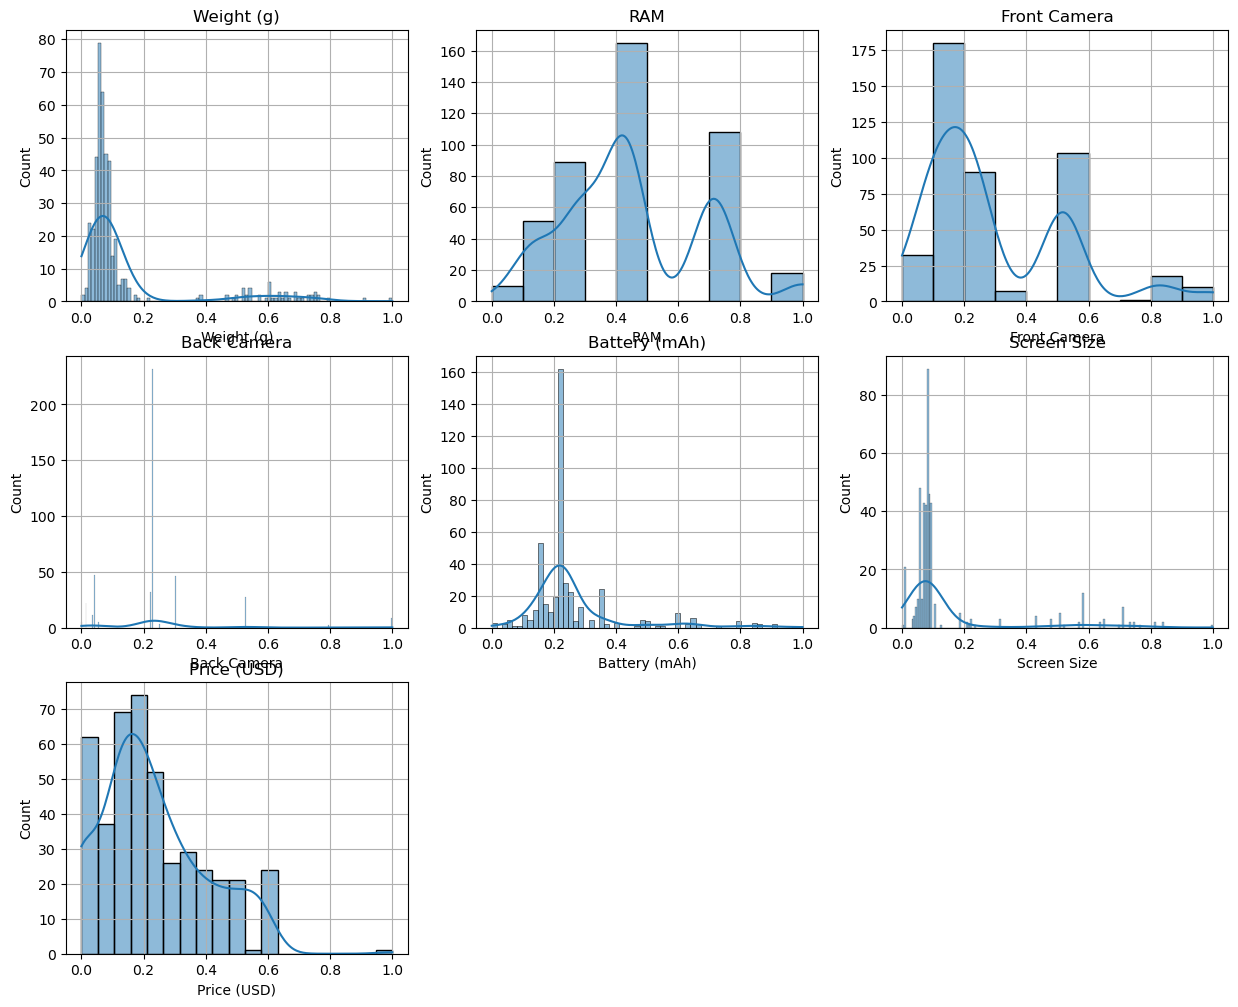

In [49]:
# Visualização da distribuição após a normalização
graphic_by_feature_independently(
    data=df_normalized,
    figsize=[15,4],
    n_cols=3,
    graph_type='histogram+kde'
)

Os histogramas dos atributos, após a normalização, apresenta valores que foram escalados para o intervalo de 0 a 1, mantendo a forma da distribuição original.

### Padronização

A padronização (ou Z-score scaling) transforma os dados para ter média 0 e desvio padrão 1. É útil para algoritmos que são sensíveis à escala das características, como SVMs ou redes neurais.

In [50]:
# Inicializar o StandardScaler
scaler_std = StandardScaler()
# Aprende média e desvio padrão APENAS de X_train
scaler_std.fit(X_train)
X_train_standardized = scaler_std.transform(X_train)
# Usa a média e o desvio padrão aprendidos de X_train
X_test_standardized = scaler_std.transform(X_test)
# Exibir as primeiras linhas dos dados padronizados (como DataFrame para melhor visualização)
df_standardized = pd.DataFrame(X_train_standardized, columns=X_train.columns)

print("\nPrimeiras 5 linhas dos dados padronizados (treino):")
df_standardized.head()


Primeiras 5 linhas dos dados padronizados (treino):


,Weight (g),RAM,Front Camera,Back Camera,Battery (mAh),Screen Size,Price (USD)
0,-0.414380,1.181738,0.995618,-0.017678,0.084404,-0.545564,1.050386
1,-0.059342,1.181738,-0.543512,4.619186,-0.238705,-0.263703,-1.363604
2,-0.320949,-0.747243,-0.235686,-0.017678,-0.238705,-0.391822,-0.679326
3,-0.414380,-0.747243,-1.082207,-1.161438,-0.238705,-0.443069,-0.748515
4,-0.461096,-0.104250,-0.235686,0.415096,-0.157928,-0.327763,-0.502896


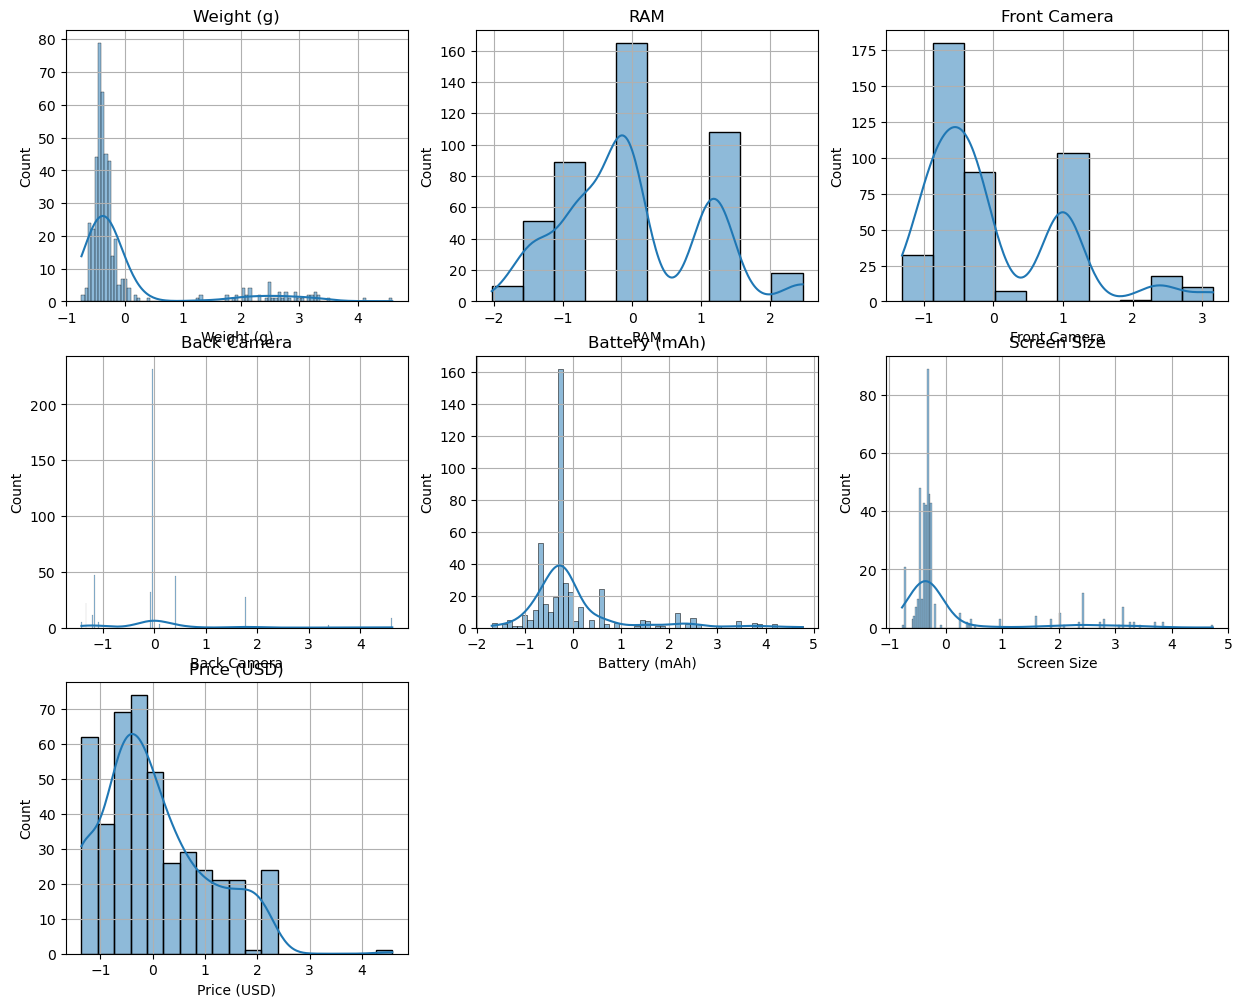

In [51]:
# Visualização da distribuição após a padronização
graphic_by_feature_independently(
    data=df_standardized,
    figsize=[15,4],
    n_cols=3,
    graph_type='histogram+kde'
)

Os histogramas dos atributos, após a padronização, apresentam valores que foram transformados para ter uma média próxima de zero e um desvio padrão de um, centralizando a distribuição.

## Encerramento

Este trabalho se encerra no pré-processamento, que é seu escopo. A partir deste ponto seguiríamos para o treinamento de um modelo de ML para resolver o problema de classificação, agora com dados já rotulados e bases distintas para as fases de treino e teste.